# 进程

## 进程的内容

## 进程常用命令

在Linux中，有许多命令可以用来查看和管理进程，以下是一些常用的命令：

1. `ps`：查看进程状态。常用的选项包括：
    - `ps aux`：显示所有进程的详细信息，包括CPU、内存占用等。
    - `ps -ef`：显示所有进程的信息，包括进程之间的父子关系。
    - `ps -e --forest`：以树状结构显示进程之间的父子关系。
    - `ps -e | grep XX`：显示所有进程名字中带XX的进程详细信息。

2. `pstree`：以树状图显示进程。

3. `top`：实时显示进程动态。

4. `kill`：结束进程。例如，`kill -9 pid`可以强制结束指定的进程。

5. `pgrep`：根据指定的进程属性找出进程的pid。

6. `pmap`：查看进程内存映射信息。

7. `lsof`：查看进程打开的文件列表，包括普通文件、管道、socket等。

8. `top`: //实时查看进程  // shift + < > 翻页  

9. `top -p PID` //查看某一进程  

10. `nice` // 按用户指定的优先级运行进程  

11. `jobs`  

12. `bg`  

13. `fg` 

```kernel
ps -ef|grep bash  
nice -n 10 /bin/bash  
renice 5 16573  
kill -9 16573  
```

control + z 将前台进程转为后台进程并停止  
fg 1 恢复  
bg   

## 子进程的创建

> 子进程创建-fork

```C
#include  <unistd.h>
pid_t  fork(void);
```

- 功能： 创建新的进程
- 返回值：
    - 失败时：返回-1    
    - 成功时：父进程返回子进程的进程号，子进程返回0 
**通过fork的返回值区分父进程和子进程**

typedef short pid_t; /* used for process ids */ pid_t其实就是一个short类型的变量，实际表示的是内核中进程表的索引

### code: 创建一个子进程并打印进程号

In [3]:
#include <sys/types.h>
#include <stdio.h>
#include <unistd.h>

int main(int argc,char **argv)
{

    pid_t pid;
    pid = fork();//子进程会复制父进程的所有代码,并运行fork之后的代码
    printf("pid=%d\n",(int)pid);
}

pid=58620
pid=0


通过打印结果可知子进程先返回，父进程后返回

父进程创建子进程，创建完后父子进程进入休眠

子进程将复制父进程的所有代码,并运行fork之后的代码

### code: 父子进程的运行关系

In [1]:
#include <sys/types.h>
#include <stdio.h>
#include <unistd.h>

int main(int argc,char **argv)
{

    pid_t pid;
    printf("before fork\n");
    pid = fork();//子进程将复制父进程的所有代码,并运行fork之后的代码
    if(pid==0)
    {
        printf("This is child process\n");
        printf("pid=%d\n",(int)pid);  // 打印父进程的pid
        printf("child after fork\n");
        while(1)
        {
           sleep(1);
           printf("child sleep\n");
        }

    }
    else if(pid>0)
    {
        printf("This is father process\n");
        printf("pid=%d\n",(int)pid);  // 打印子进程的pid
        printf("father after fork\n");
        while(1)
        {
            sleep(1);
            printf("father sleep\n");//打印完成后父进程休眠,一直循环
        }
    }
    else if(pid<0) //进程创建失败
    {
       perror("fork");
       return 0;
    }
}

before fork
This is father process
pid=31837
father after fork
This is child process
pid=0
child after fork
father sleep
child sleep
father sleep
child sleep
father sleep
child sleep
father sleep
child sleep
father sleep
child sleep
father sleep
child sleep


从上面的代码可知进程先返回子进程的进程号，后返回父进程的进程号。先运行的是父进程，后运行的是子进程，之后父进程和子进程分别并行

## 父子进程的关系

子进程继承了父进程的内容  
父子进程有独立的地址空间，互不影响

若父进程先结束  
子进程成为`孤儿进程`，被init进程收养,子进程变成后台进程  

若子进程先结束  
父进程如果没有及时回收，子进程变成`僵尸进程`  

通过进程号可以查看哪个是父进程哪个是子进程

> 创建多个子进程

### code: 使用for循环，创建多个子进程

In [6]:
#include <stdio.h>
#include <unistd.h>
#include <sys/types.h>

int main()
{
    pid_t pid;
    int i;    
    for(i=0; i<5; i++)
    {
        pid = fork();//会循环创建进程
        if(pid<0)
        {
            perror("fork");
            return 0;
        }
        else if(pid==0)
        {
            printf("child process no.%d, return pid is %d\n, parent pid is %d, mypid is %d",i, (int)pid, (int)getppid(), (int)getpid());
            sleep(5);
            break;//加这句话子进程不会再创建孙进程
        }
        else
        {
            printf("Father process no.%d, return pid is %d, parent pid is %d\n, mypid is %d",i, (int)pid, (int)getppid(), (int)getpid());
            sleep(5);
        }
    }

    sleep(5);
}

Father process no.0, return pid is 36356, parent pid is 35300
, mypid is 36354child process no.0, return pid is 0
, parent pid is 36354, mypid is 36356

Father process no.1, return pid is 36363, parent pid is 35300
, mypid is 36354child process no.1, return pid is 0
, parent pid is 36354, mypid is 36363Father process no.2, return pid is 36368, parent pid is 35300
, mypid is 36354child process no.2, return pid is 0
, parent pid is 36354, mypid is 36368Father process no.3, return pid is 36373, parent pid is 35300
, mypid is 36354child process no.3, return pid is 0
, parent pid is 36354, mypid is 36373Father process no.4, return pid is 36379, parent pid is 35300
, mypid is 36354child process no.4, return pid is 0
, parent pid is 36354, mypid is 36379

![alt text](循环创建子进程.JPG)

## 进程的结束

```C
#include <stdlib.h> 
#include  <unistd.h>
void  exit(int  status);
void  _exit(int  status);
void  _Exit(int  status);
```

1. `void exit(int status);`：这是C库函数，用于正常终止一个程序。它会先执行一些清理工作，比如调用由atexit()和on_exit()注册的函数，关闭所有的stdio流等，然后才会结束进程。status参数是进程的退出状态，通常0表示成功，非0表示出错。

2. `void _exit(int status);`：这是系统调用，用于立即结束一个程序，不会执行任何清理工作。status参数是进程的退出状态。

3. `void _Exit(int status);`：这是C库函数，和_exit()功能相同，用于立即结束一个程序，不会执行任何清理工作。status参数是进程的退出状态。


### code : 使用_exit(0)结束进程

In [1]:
#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>

int main(int argc,char**argv)
{
   printf("hello world");
   _exit(0);
   printf("after exit");
   return 0;
}

hello world

### code:使用wait等待子进程回收

In [1]:
#include <stdio.h>
#include <sys/wait.h>
#include <unistd.h>
#include <stdlib.h>

int main(int argc, char** argv)
{

   pid_t pid;
   pid_t rpid;

   pid = fork();
   int status;  //子进程退出时的状态
   if(pid<0)
   {
      perror("fork");
      return 0;
   }
   else if(pid == 0)
   {
      sleep(1);
      printf("child will exit\n");
      exit(2);

   }
   else if(pid >0)  //父进程段
   {
      rpid = wait(&status);
      //wait函数会阻塞父进程,直到子进程退出
      //wait函数的原型为：int wait(int *status)
      //这个函数的作用是：让一个进程等待直到它的一个子进程结束
      //子进程返回会将status的值设为子进程的退出状态
      //如果status不是NULL,wait会将子进程退出时的状态存入status指向的位置
      //如果status是NULL,wait会丢弃子进程的退出状态
      //wait函数返回值是子进程的pid
      //如果返回失败会返回-1并设置errno为ECHILD
      printf("Get child status=%x\n",WEXITSTATUS(status));//用宏来取得具体的值
      // WEXITSTATUS宏的原型是：int WEXITSTATUS(int status)
      //这个宏的作用是：取得子进程的退出状态
      //如果子进程正常退出,那么status的值是子进程的退出状态
      //如果子进程不是正常退出,那么status的值是未定义的
      //如果子进程没有退出,那么status的值是未定义的
   }
   while(1)
   {
     sleep(1);
   }

}

child will exit
Get child status=2


### code: 使用waitpid函数等待子进程回收

In [ ]:
#include <stdio.h>
#include <sys/wait.h>
#include <unistd.h>
#include <stdlib.h>

int main(int argc, char** argv)
{

  pid_t pid;
  pid_t rpid;
  pid = fork();
  int status;
  if(pid<0)
  {
    perror("fork");
    return 0;
  }
  else if(pid == 0)
  {
    sleep(10);
    printf("child will exit\n");
    exit(2);
  }
  else if(pid >0)
  {
    //rpid = wait(&status);
    sleep(20);
    waitpid(-1,&status,WNOHANG);
    // waitpid函数的原型是
    // pid_t waitpid(pid_t pid,int *status,int options)
    // pid参数的值有三种情况
    // 1. pid>0,等待进程ID为pid的子进程
    // 2. pid=-1,等待任意一个子进程
    // 3. pid=0,等待组ID等于调用进程组ID的任意一个子进程
    // 4. pid<-1,等待组ID等于pid的绝对值的任意一个子进程
    // status参数的作用和wait函数一样
    // options参数的值有三种情况
    // 1. WNOHANG,如果没有子进程退出立即返回
    // 2. WUNTRACED,如果子进程进入暂停状态立即返回
    // 3. WCONTINUED,如果子进程被继续立即返回
    printf("Get child status=%x\n",WEXITSTATUS(status));
  }

   while(1)
   {
     sleep(1);
   }

}

## exec函数族

进程调用exec函数族执行某个程序,进程当前内容被指定的程序替换,实现让父子进程执行不同的程序
    
父进程创建子进程,子进程调用exec函数族,父进程不受影响  

> execl

```C
#include  <unistd.h>
  int execl(const char *path, const char *arg, …);
  int execlp(const char *file, const char *arg, …);
```

成功时执行指定的程序；失败时返回EOF

path   执行的程序名称，包含路径

arg  传递给执行的程序的参数列表

file   执行的程序的名称，在PATH中查找

### code: execl函数使用示例

In [ ]:
#include <stdio.h>
#include <unistd.h>

int main()
{
   pid_t pid;
   printf("before exec\n");
   pid = fork();
   if(pid==0)
   {//使用父子进程,以保证不被替换
   	if(execl("./test","-a","-l","./",NULL) < 0)
      {//子进程执行别的函数内容,后面的参数可能会不使用
		   perror("execl");
   	}
   }
   	printf("after execl\n");
}

> execv

```C
#include  <unistd.h>
  int execv(const char *path, char *const argv[]);
  int execvp(const char *file, char *const argv[]);
```
成功时执行指定的程序；失败时返回EOF

arg… 封装成指针数组的形式

### code: execv函数示例

In [ ]:
#include <stdio.h>
#include <unistd.h>

int main()
{
   char *agv[] = {"ls","-a","-l","./",NULL};
   if(execv("/bin/ls",agv) < 0)
   {
	   perror("execv");
   }


}

> system

```c
  #include  <stdlib.h>
  int system(const char *command);
```
 成功时返回命令command的返回值；失败时返回EOF
 
 当前进程等待command执行结束后才继续执行

### code : system函数使用示例

In [ ]:
#include <stdio.h>
#include <stdlib.h>

int main()
{
	system("ls -a -l ./");
}

## 守护进程

In [3]:
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <sys/types.h>
#include <sys/stat.h>
int main()
{
    //1.创建子进程
    pid_t pid;
    pid = fork();
    if(pid < 0)
    {
      perror("fork");
      return 0;
    }
    else if(pid > 0)
    {
        exit(0); //父进程退出
        //sleep(100);
    }
    // pid = 0
    printf("I am a demon\n");
    printf("sid=%d, pid=%d, pgid=%d\n", getsid(getpid()), getpid(), getpgid(getpid()));
    // sid为会话ID,pgid为进程组ID

    //2.创建新的会话
    if(setsid()< 0)  // setsid函数的原型是pid_t setsid(void),作用是创建一个新的会话 
    {
      perror("setsid");
      exit(0);
    }  
    printf("after sid=%d,pid=%d,pgid=%d\n",getsid(getpid()),getpid(),getpgid(getpid()));

    //3.更改当前工作目录
    chdir("/");  // chdir函数的原型是int chdir(const char *path),作用是改变当前工作目录

    //4.重设文件权限掩码
    if(umask(0) < 0)  // umask函数的原型是mode_t umask(mode_t mask),作用是设置文件权限掩码,
    // mask为新的文件权限掩码,返回值为原来的文件权限掩码,默认为0022,即文件权限为644
    // mask为0,则文件权限为666
    // mask和文件权限的关系为:文件权限=666-mask
    {
      perror("unmask");
      exit(0);
    }

    //5.关闭文件描述符
    close(0);  //关闭标准输入
    close(1);  //关闭标准输出
    close(2);  //关闭标准错误
    printf("after close \n");  
    sleep(5);
}

/tmp/tmp21v0__nq.c: In function ‘main’:
/tmp/tmp21v0__nq.c:23:38: warning: implicit declaration of function ‘getsid’; did you mean ‘getgid’? [-Wimplicit-function-declaration]
   23 |     printf("sid=%d,pid=%d,pgid=%d\n",getsid(getpid()),getpid(),getpgid(getpid()));
      |                                      ^~~~~~
      |                                      getgid
/tmp/tmp21v0__nq.c:23:64: warning: implicit declaration of function ‘getpgid’; did you mean ‘getegid’? [-Wimplicit-function-declaration]
   23 |     printf("sid=%d,pid=%d,pgid=%d\n",getsid(getpid()),getpid(),getpgid(getpid()));
      |                                                                ^~~~~~~
      |                                                                getegid


I am a demon
sid=29351,pid=43633,pgid=29351
after sid=43633,pid=43633,pgid=43633


## GDB 调试多进程程序

set follow-fork-mode child     设置GDB调试子进程

set follow-fork-mode parent   设置GDB调试父进程

set detach-on-fork  on/off    设置GDB跟踪调试单个进程或多个

on: 只调试父进程或子进程的其中一个，(根据follow-fork-mode来决定)，这是默认的模式

off：父子进程都在gdb的控制之下，其中一个进程正常调试(根据follow-fork-mode来决定),另一个进程会被设置为暂停状态。

info inferiors    显示GDB调试的进程

inferiors  进程序号（1,2,3....）  切换GDB调试的进程

# 线程

使用线程相关的函数编译时需要加上-lpthread

## 线程的创建

线程的创建可以使用函数:

 ```c
 #include  <pthread.h>
 int  pthread_create(pthread_t *thread, 
                     const pthread_attr_t *attr, 
                     void *(*routine)(void *), 
                     void *arg);
```
成功返回0，失败时返回错误码  
第一个参数:thread 线程对象  
第二个参数:attr 线程属性，NULL代表默认属性  
第三个参数:routine 线程执行的函数  
arg 传递给routine的参数 ，参数是void * ，注意传递参数格式   

### code :  线程的创建和函数调用

In [4]:
// 线程的创建和函数调用
#include <stdio.h>
#include <pthread.h>
#include <unistd.h>
     
int *testThread(char *arg) 
{
    printf("This is a thread test\n");
    return NULL;
}
     
int main()
{
    pthread_t tid;  // 创建的线程对象
    int ret;
    ret = pthread_create(&tid, NULL, (void*)testThread, NULL);
     
    printf("this is main thread\n");
     
    sleep(1);  //打印函数也需要时间,否则主线程直接退出,子线程则没有时间生存
     
}

this is main thread
This is a thread test


+ 注意：主进程的退出，它创建的线程也会退出。线程创建需要时间，如果主进程马上退出，那线程不能得到执行；


+ 编译错误  
```kernel
warning: passing argument 3 of ‘pthread_create’ from incompatible pointer type [-Wincompatible-pointer-types]

        ret = pthread_create(&tid,NULL,testThread,NULL);
                                        ^
   note: expected ‘void * ( * )(void * )’ but argument is of type ‘int * ( * )(char *)
```
   意义：  
   表示pthread_create参数3的定义和实际代码不符合，期望的是void * (*)(void *) ，实际的代码是int * ( * )(char *)  

   解决方法：改为pthread_create(&tid,NULL,(void*)testThread,NULL);  

## 获取线程ID

pthread_self(void)函数

```C
#include <pthread.h>
pthread_t pthread_self(void)
```

功能：查看自己的线程ID\TID;

## 线程的结束


线程结束函数

```C
#include <pthread.h>
void pthread_exit(void *retval);
```

结束当前线程；  
retval可被其他线程通过pthread_join获取；  
线程私有资源被释放；  

### code: 线程的创建和参数传递

> 线程创建

In [ ]:
//线程的创建和参数传递
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>

void *testThread(void *arg)
{
    printf("This is a thread test,pid=%d,tid=%lu\n",getpid(),pthread_self());//打印进程号和线程号    
    pthread_exit(NULL);
    printf("after pthread exit\n");
}
int main()
{
    pthread_t tid;
    int ret;

    ret = pthread_create(&tid,NULL,testThread,NULL);
    printf("This is main thread,tid=%lu\n",tid);    
    sleep(1);
}

> 参数的传递

>> + 方式1：通过地址传递参数，注意类型的转换；

In [5]:
#include <stdio.h>
#include <pthread.h>
#include <unistd.h>
     
void *testThread(void *arg) 
{
    printf("This is a thread test tid=%lu\n", pthread_self());     
    printf("intput arg=%d\n", *(int *)arg);//不可以直接用*arg来取值,传递进来的是void *
    pthread_exit(NULL);
}
     
int main()
{
    pthread_t tid;
    int ret;
    int arg = 5;
    ret = pthread_create(&tid, NULL, testThread, (void*)&arg);
     
    printf("this is main thread tid=%lu\n", tid);
     
    sleep(1);
     
}

this is main thread tid=131623163000384
This is a thread test tid=131623163000384
intput arg=5


编译错误之处：
```kernel
    createP_t.c:8:34: warning: dereferencing ‘void *’ pointer
         printf("input arg=%d\n",(int)*arg);
                                      ^
    createP_t.c:8:5: error: invalid use of void expression
         printf("input arg=%d\n",(int)*arg);
```
错误原因：是void * 类型指针不能直接用* 取值（*arg），因为编译不知道数据类型。

解决方法：转换为指定的指针类型后再用* 取值  比如：*(int *)arg

>> + 方式2: 值传递，这时候编译器会告警，需要程序员自己保证数据长度正确

In [ ]:
#include <stdio.h>
#include <pthread.h>
#include <unistd.h>
     
void *testThread(void *arg) 
{
    printf("This is a thread test tid=%lu\n", pthread_self()); 
    printf("intput arg=%d\n", (int)arg);//
    pthread_exit(NULL);
}
     
int main()
{
    pthread_t tid;
    int ret;
    int arg = 5;
    ret = pthread_create(&tid, NULL, (void*)testThread, (void *)arg);
     
    printf("this is main thread tid=%lu\n", tid);
     
    sleep(1);
     
}

### code:创建多个线程并打印每个线程的序号

In [ ]:
//创建多个线程并打印每个线程的序号
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>

void *testThread(void *arg)
{
    printf("This is a thread test,pid=%d,tid=%lu\n",getpid(),pthread_self());
    printf("This is %d thread.\n", (int)arg);

    pthread_exit(NULL);
    while(1)
    {
        sleep(1);
    }
    printf("after pthread exit\n");
}
int main()
{
    pthread_t tid[5];
    int ret;
    int arg = 5;
    for(int i=0; i<5; i++)
    {   
        ret = pthread_create(&tid[i],NULL,testThread,(void *)i);
        //如果这里传递地址,线程来不及更新值
        //sleep(1);   //使用地址的话需要使用休眠,但使用休眠将降低程序运行效率,应当考虑传值
        printf("This is main thread,tid=%lu\n",tid[i]);    
    }
    while(1)
    {
        sleep(1);
    }
}

## 线程的回收

对于一个默认属性的线程A来说，线程占用的资源并不会因为执行结束而得到释放；

pthread_join函数：
```c
    #include <pthread.h>
    int pthread_join(pthread_t thread, void **ratval);
```

成功返回0，失败时返回错误码；  
参数：  
第一个参数: thread ：要回收的线程对象；  调用线程阻塞直到thread结束；  
第二个参数: *ratval ：接收线程thread 的返回值；  
注意：  
pthread_join 是阻塞函数，如果回收的线程没有结束，则一直等待  

In [ ]:
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>
void *func(void *arg)
{
    printf("This is child thread\n");
    sleep(1);  //这里时间越长,下面线程回收阻塞时间越长
    pthread_exit("thread return");
}


int main()
{
    pthread_t tid;
    void *retv;
    pthread_create(&tid, NULL, func, NULL);
    pthread_join(tid,&retv);  //线程回收
    printf("thread ret=%s\n",(char*)retv);//需要等到调用函数执行完才打印
    sleep(1);
}

In [ ]:
// 创建并回收多个线程
#include <stdio.h>
#include <pthread.h>
#include <unistd.h>
     
void *func(void *arg) 
{
    printf("this is child thread\n");
    sleep(5);
    pthread_exit("thread return");
}
     
int main()
{
    pthread_t tid[5];
    void *retv;
     
    for (int i = 0; i < 5; i++) 
    {
        pthread_create(&tid[i], NULL, func, NULL);//循环创建多个行程
    }
     
    for (i = 0; i < 5; i++) 
    {
    	pthread_join(tid[i], &retv);//循环回收多个线程
    	printf("thread ret=%s\n", (char *)retv);
    }
    sleep(1);
     
}

## 线程的分离
  

1. pthread_detach函数  

```C
int pthread_detach(pthread_t thread);
```

成功返回0，失败返回错误号；  

作用：线程主动与主控线程断开关系。（父线程结束后不会产生僵尸线程）

In [ ]:
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>
void *func(void *arg)
{
    pthread_detach(pthread_self());
    printf("This is child thread\n");
    sleep(25);
    pthread_exit("thread return");
}


int main()
{
    pthread_t tid[100];
    void *retv;
    int i;
    for(i=0;i<100;i++)
    {
        pthread_create(&tid[i],NULL,func,NULL);
        pthread_detach(tid);//线程的分离,传递进程号
    }
    while(1)
    {    
        sleep(1);
    } 

}

2. 创建线程时设置分离属性  
```c
    pthread_attr_t attr;
    pthread_attr_init(&attr);
    pthread_attr_setdetachstate(&attr,PTHREAD_CREATE_DETACHED);
```

In [ ]:
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>

void *func(void *arg)
{
    printf("This is child thread\n");
    sleep(25);
    pthread_exit("thread return");
}


int main()
{
    pthread_t tid[100];
    void *retv;
    pthread_attr_t attr;   /*通过线程属性来设置游离态（分离态）*/
    pthread_attr_init(&attr);
    pthread_attr_setdetachstate(&attr,PTHREAD_CREATE_DETACHED);

    for(int i=0;i<100;i++)
    {
        pthread_create(&tid[i],&attr,func,NULL);
        pthread_detach(tid);
    }
    while(1)
    {    
        sleep(1);
    } 
}

## 线程的取消


意义：随时杀掉一个线程

```C
int pthread_cancel(pthread_t thread);
```

注意：线程的取消要有取消点才可以，不是说取消就取消，线程的取消点主要是阻塞的系统调用

如果没有取消点，手动设置一个；

```C
void pthread_testtcancel(void);
```

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <pthread.h>
     
void *func(void *arg) 
{
    printf("this is child thread\n");
    while(1)
    {
    	sleep(5);
        pthread_testcancel();//设置取消点
    }
    pthread_exit("thread return");
}
     
int main() 
{
    pthread_t tid;
    void *retv;
    int i;
    pthread_create(&tid, NULL, func, NULL);
    sleep(5);
    pthread_cancel(tid); //线程取消
    pthread_join(tid, &retv); // 线程回收
    
    while(1) 
    {
    	sleep(1);
    }
}

运行段错误：  

可以使用gdb调试；  

1、使用gdb编译代码；  
```
gcc -g -o xxx xxx.c
```

 2、使用gdb运行程序；  
``` 
gdb ./xxx
```

3、运行之后使run命令；  
```
（gdb）run
```
等待出现Thread 1 "xxx" received signal SIGSEGV, Segmentation fault.  

4、输入命令bt（打印调用栈）  
```
(gdb) bt
```

#0  0x00007ffff783ecd0 in vfprintf () from /lib/x86_64-linux-gnu/libc.so.6  
#1  0x00007ffff78458a9 in printf () from /lib/x86_64-linux-gnu/libc.so.6  
#2  0x00000000004007f9 in main () at xxx.c:21  

确定段错误位置是xxx.c21行  

设置取消属性
```
    int pthread_setcancelstate(int state, int *oldstate);
    PTHREAD_CANCEL_ENABLE  
    PTHREAD_CANCEL_DISABLE
```
设置不能取消：PTHREAD_CANCEL_ENABLE  
设置可以取消：PTHREAD_CANCEL_DISABLE  

In [ ]:
    #include <stdio.h>
    #include <unistd.h>
    #include <pthread.h>
     
    void *func(void *arg) {
    	printf("this is child thread\n");
     
        pthread_setcancelstate(PTHREAD_CANCEL_DISABLE,NULL);
    //设置程序5秒之前不可取消
     
    	while(1) {
    		sleep(5);
            pthread_testcancel();
    	}
        
        pthread_setcancelstate(PTHREAD_CANCEL_ENABLE,NULL);
    //设置程序5秒之后可以取消
     
        while(1) {
    		sleep(1);
    	}
        
    	pthread_exit("thread return");
    }
     
    int main() {
    	pthread_t tid;
    	void *retv;
    	int i;
    	pthread_create(&tid, NULL, func, NULL);
    	sleep(1);
    	pthread_cancel(tid);
    	pthread_join(tid, &retv);
     
    	while(1) {
    		sleep(1);
    	}
    }

设置取消类型：  
```
    int pthread_setcanceltype(int type, int *oldtype);
    PTHREAD_CANCEL_DEFERRED     
    PTHREAD_CANCEL_ASYNCHRONOUS      
```
等到取消点才取消：PTHREAD_CANCEL_DEFERRED  
目标线程会立即取消：PTHREAD_CANCEL_ASYNCHRONOUS  

## 线程的清理

应用的场景是:  
如果线程当中有申请内存和释放的操作,如果线程中途被取消,内存得不到及时的释放会造成程序内存的泄露
```
    void pthread_cleanup_push(void (*routine) (void *), void *arg)
    void pyhread_cleanup_pop(int execute)
```

routine函数被执行的条件：  
1、被pthread_cancel取消掉；  
2、执行pthread_exit;  
3、非0参数执行pthread_cleanup_pop()  

注意：  
1、必须成对使用，即使pthread_cleanup_pop不会被执行也要必须写上，否则编译会错误；  
2、pthread_cleanup_pop（）被执行且参数为0，pthread_cleanup_push回调函数routine不会被执行；  
3、pthread_cleanup_push 和 pthread_cleanup_pop 可以写多对，routine执行顺序正好相反（类似于栈先进后出）  
4、线程内的return 可以结束线程，也可以给pthread_join 返回值，但不能触发pthread_cleanup_push里面的回调函数，所以我们结束线程尽量使用pthread_exit退出线程。

In [ ]:
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>

void cleanup(void *arg)
{
    printf("cleanup,arg=%s\n",(char*)arg);

}
void cleanup2(void* arg){

    printf("cleanup2,arg=%s\n",(char*)arg);
}

void *func(void *arg)
{
    printf("This is child thread\n");
    pthread_setcanceltype(PTHREAD_CANCEL_ASYNCHRONOUS,NULL);
    pthread_cleanup_push(cleanup,"abcd");
    while(1)
    {
        sleep(1);
        
    }
    pthread_exit("thread return");
}


int main()
{
    pthread_t tid;
    void *retv;
    int i;
    pthread_create(&tid,NULL,func,NULL);
    sleep(1);
    pthread_cancel(tid);
    pthread_join(tid,&retv);
    //printf("thread ret=%s\n",(char*)retv);
    while(1)
    {    
        sleep(1);
    } 

}

# 互斥锁


互斥锁的应用来源于临界资源调用的需要

临界资源:   
一次只允许一个任务访问的共享资源

例如避免两个线程同时写一个文件  

可以使用互斥机制来避免同时访问临界资源  

互斥机制:  
mutex互斥锁,任务访问临界资源申请锁,访问完后释放锁

## 互斥锁的创建(初始化)



+ 动态方式:

```c
int pthread_mutex_init(pthread_mutex_t *mutex, const pthread_mutexattr_t *attr);
```

成功时返回0 ，失败时返回错误码；  

参数：  
mutex ：指向要初始化的互斥锁对象；  
mutexattr ：用于指定互斥锁属性，如果为NULL测使用缺省属性   

man函数出现 No manual entry for pthread_mutex_xxx（找不到pthread_mutex_xxx）  
解决办法：apt-get install manpages-posix-dev  


+ 静态方式：

```c
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
```

## 互斥锁的销毁:
```c
int pthread mutex destroy(pthread mutex_t *mutex)
```
在Linux中，互斥锁并不占用任何资源，因此LinuxThreads中的 pthread_mutex_destroy() 除了检查锁状态以外（锁定状态则返回EBUSY）没有其他动作。

## 互斥锁的使用

> 申请锁

```c
    int pthread_mutex_lock(pthread_mutex_t *mutex)；
    int pthread_mutex_trylock(pthread_mutex_t *mutex)
```
成功时返回0， 失败时返回错误码；

参数：  
mutex：指向要初始化的互斥锁对象；   
pthread_mutex_lock 如果无法获得锁，任务阻塞；  
pthread_mutex_trylock 如果无法获得锁，返回EBUSY而不是挂起等待 

> 释放锁

```c
    #include <pthread.h>
    int pthread_mutex_unlock(pthread_mutex_t *mutex)
```
成功时返回 0， 失败时返回错误码；  

参数:  
mutex ：指向要初始化的互斥锁对象；    

### code:实现多个线程写一个文件，使用互斥锁

In [ ]:
//实现多个线程写一个文件，使用互斥锁
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>
#include <string.h>
 
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER; //静态方式创建一个互斥锁
FILE *fp;

void *func2(void *arg)
{
    pthread_detach(pthread_self());   // 将子线程从父线程中分享
    printf("This func2 thread\n");
    
    char str[]="I write func2 line\n";
    char c;
    int i=0;
    while(1)
    {
        pthread_mutex_lock(&mutex);  //上锁
        while(i<strlen(str)) // 一个字符一个字符地写
        {
            c = str[i];
            fputc(c,fp);
            usleep(1);
            i++;
        }
        pthread_mutex_unlock(&mutex);  //解锁
        i=0;
        usleep(1);
 
    }
 
    pthread_exit("func2 exit");
 
}
 
void *func(void *arg)
{
    pthread_detach(pthread_self());
    printf("This is func1 thread\n");
    char str[]="You read func1 thread\n";
    char c;
    int i=0;
    while(1)
    {
        pthread_mutex_lock(&mutex);//加锁
        while(i<strlen(str))
        {
            c = str[i];
            fputc(c,fp);
            i++;
            usleep(1);//线程挂起，延迟1us
        }
        pthread_mutex_unlock(&mutex);//解锁
        i=0;
        usleep(1);
 
    }
    pthread_exit("func1 exit");
}
 
 
int main()
{
    pthread_t tid, tid2;
    void *retv;
    int i;
    fp = fopen("1.txt", "a+");//打开一个文件
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
 
 
    pthread_create(&tid, NULL, func, NULL);  //创建线程1，执行函数func
    pthread_create(&tid2, NULL, func2, NULL); //创建线程2，执行函数func2
    while(1)
    {    
        sleep(1);
    } 
 
}

# 读写锁

特性:  
对于写者：写者使用写锁(我在写其他人就不要再写了,保证同一时间只有一个人在写)    
如果当前没有读者，也没有其他写者，写者立即获得写锁；(没人读也没人写,那我就写了)  
否则写者将等待，直到没有读者和其他写者；(有人在写或有人在读,我就不要上去写了)    
对于读者 ：读者使用读锁(我在读,不要让想来写的人过来写)    
如果当前没有写者，读者立即获取读锁；(没人在写,我就可以过去读)  
否则读者等待，直到没有写者。(有人写,我就等别人写完我再过去读)  

注意：    
同一时刻只有一个线程可以获得写锁(同一时间只能有一个人在写)  
同一时刻可以有多个线程获得读锁。(有人在读也不妨碍很多人一起读)  
读写锁处于写锁状态时，所有试图对读写锁加锁的线程，不管是读者试图加读锁，还是写者试图加写锁，都会被阻塞；(有人上去写的时候,所有人想写的人都得等着,他写的时候其他人也不准看)  
读写锁处于读锁状态时，有写者试图加写锁时，之后的其他线程的读锁请求会被阻塞，以避免写者长时间的不写锁；(有人正在读,这时有人过来说要过来写,那之后说想读的都得等着,等他写完才能看)  

## 读写锁的使用



初始化(创建)一个读写锁：
```c
pthread_rwlock_init
```

读锁定：
```c
pthread_rwlock_rdlock
```
非阻塞 读锁定：
```c
pthread_rwlock_tryrdlock
```

写锁定：
```c
pthread_rwlock_wrlock
```
非阻塞 写 锁定：
```c
pthread_rwlock_trywrlock
```

解锁读写锁：
```c
pthread_rwlock_unlock
```
释放读写锁
```c
pthread_rwlock_destroy
```

### code:读写锁的实现

In [ ]:
#include <pthread.h>
#include <stdio.h>
#include <unistd.h>
#include <string.h>     
    
pthread_rwlock_t rwlock;
FILE *fp;

void * read_func(void *arg) //读线程
{
    pthread_detach(pthread_self());
    printf("read thread\n");
    char buf[32]={0};
    while(1)
    {
        //rewind(fp);
        pthread_rwlock_rdlock(&rwlock);  //加读锁,写线程不能写了
        while(fgets(buf,32,fp)!=NULL)   // 从文件中读取32个字符到buf
        {
            printf("%d,rd=%s\n",(int)arg,buf);
            usleep(1000);
        }
        pthread_rwlock_unlock(&rwlock);  //解读锁,写线程可以写了
        sleep(1);
    }     
}
     
     
     
void *func2(void *arg)   // 写线程
{
    pthread_detach(pthread_self());
    printf("This func2 thread\n");
        
    char str[]="I write func2 line\n";
    char c;
    int i=0;
    while(1)
    {
        pthread_rwlock_wrlock(&rwlock);  //加写锁
        while(i<strlen(str))
        {
            c = str[i];
            fputc(c,fp);
            usleep(1);
            i++;
        }
        pthread_rwlock_unlock(&rwlock);  //解写锁
        i=0;
        usleep(1);
    }
    pthread_exit("func2 exit");

}
     
void *func(void *arg)          // 写进程
{
    pthread_detach(pthread_self());
    printf("This is func1 thread\n");
    char str[]="You read func1 thread\n";
    char c;
    int i=0;
    while(1)
    {
        pthread_rwlock_wrlock(&rwlock);   //加写锁
        while(i<strlen(str))
        {
            c = str[i];
            fputc(c,fp);
            i++;
            usleep(1);
        }
        pthread_rwlock_unlock(&rwlock);   //加读锁
        i=0;
        usleep(1);
    }
    pthread_exit("func1 exit");
}
          
int main()
{
    pthread_t tid1,tid2,tid3,tid4;
    void *retv;
    int i;
    fp = fopen("1.txt","a+");
    if(fp==NULL)
    {
        perror("fopen");
        return 0;
    }
    pthread_rwlock_init(&rwlock,NULL);
    pthread_create(&tid1,NULL,read_func,1);//读者1
    pthread_create(&tid2,NULL,read_func,2);//读者2
    pthread_create(&tid3,NULL,func,NULL);//写者1
    pthread_create(&tid4,NULL,func2,NULL);//写者2
    while(1)
    {    
        sleep(1);
    } 
     
}

# 死锁

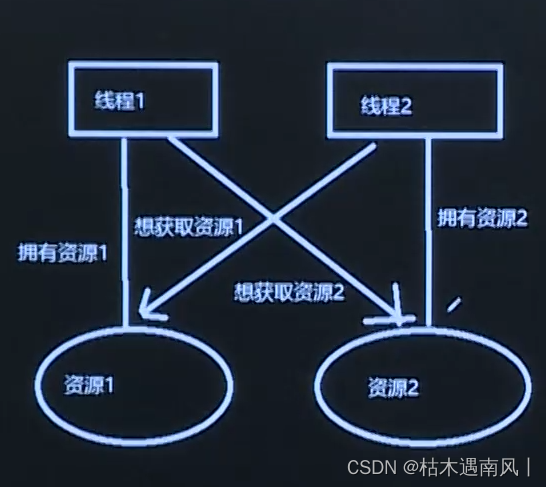  
一个线程想要访问另一个线程的资源，但是变个资源锁在别人手中

避免方法：

1、锁越少越好，最好使用一把锁；

2、调整好锁的顺序

# 条件变量


应用场景：生产者消费问题，是线程同步的一种手段；  
必要性：为了实现等待某个资源，让线程休眠，提高运行效率；    
让线程在等待资源的情况下休眠    
使用时需要和互斥锁配合    

> + 等待资源：   

1、一直等待资源  
```c
int pthread_cond_wait(pthread_con_t *cond, pthrad_mutex_t *mutex);
```
2、等待资源，只等待一段时间  
```c
int pthread_cond_timedwait(pthread_cond_t *cond, pthread_mutex_t *mutex, const struct timespec *mutex);
```

> + 释放资源：  

```c
int pthread_cond_signal(pthread_cond_t *cond);
int pthread_cond_broadcast(pthread_cond_t *cond);
```

**使用步骤：**  

1. 初始化

> 静态初始化
```c
pthread_cond_t cond = PTHREAD_COND_INITIALIZER;
pthread_cond_t mutex = PTHREAD_MUTEX_INITIALIZER;
```
> 动态初始化
```c
pthread_cond_init(&cond);
```
2. 生产资源线程：

```c
pthread_mutex_lock(&mutex);
```

(1) 开始生产资源：

(2) 通知一个消费线程

```c
    pthread_cond_signal(&cond);    
    pthread_mutex_unlock(&mutex);
```

(3) 广播通知多个消费线程

```c
    pthread_cond_broadast(&cond);
    pthread_mutex_unlock(&mutex));
```

1. 消费者线程：

```c
    pthread_mutex_lock(&mutex);
    while （如果没有资源）
    {           //防止惊群效应
        pthread_cond_wait(&cond, &mutex); 
    }
    //有资源了，消费资源
    pthread_mutex_unlock(&mutex); 
``` 

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <pthread.h>
#include <stdlib.h>
     
pthread_cond_t hastaxi = PTHREAD_COND_INITIALIZER;  //条件变量初始化,条件设为"有车"
pthread_mutex_t lock = PTHREAD_MUTEX_INITIALIZER;   //初始化线程锁
     
     
struct taxi // 定义链表结构体.把链表这种数据结构当作不断发车的出租车
{
    struct taxi *next;
    int num;
};
     
struct taxi *head = NULL;
     
//生产者线程
void *taxiarv(void *arg) 
{
    printf("taxi arrived thread\n");  //指示出租车到来
    pthread_detach(pthread_self());  //分离线程
    struct taxi *tx;
    int i = 1;
    while(1) 
	{
    	tx = malloc(sizeof(struct taxi));  //生产出租车
    	tx->num = i++;  //出租车的编号
    	printf("text %d comming\n", tx->num);

    	pthread_mutex_lock(&lock);   //线程锁
		//将出租车结构加入到链表
    	tx->next = head;  //将新节点加入到链表
    	head = tx;  //头指针指向新节点
    	pthread_cond_signal(&hastaxi); //通知乘客上车,条件变量 "有车"
		pthread_mutex_unlock(&lock);
    	
		sleep(1);
    }
     
    pthread_exit(0);//线程退出
}
//消费者线程
void *taketaxi(void *arg) 
{
    printf("take taxi thread\n");
    pthread_detach(pthread_self());
    struct taxi *tx;
    while(1) 
	{
    	pthread_mutex_lock(&lock);
    	while(head == NULL) 
		{
    		pthread_cond_wait(&hastaxi, &lock);
    	}
		
		//乘车
    	tx = head;
    	head = tx->next;
    	printf("take taxi %d\n", tx->num);
    	free(tx);
    	
		pthread_mutex_unlock(&lock);
    }
    pthread_exit(0);
}
     
     
int main() 
{
    pthread_t tid1, tid2;
    
	//创建两个线程，分别是出租车到来的线程和乘客上车线程
	//两个线程并发执行,两个线程共同访问出租车这样的共享资源，需要协调好两个线程的运行
    pthread_create(&tid1, NULL, taxiarv, NULL);   //生产者线程
    pthread_create(&tid2, NULL, taketaxi, NULL);  //消费者线程
     
    while (1) 
	{
    	sleep(1);
    }
     
}

注意：  
1. pthread_cond_wait(&cond, &mutex)
在没有资源等待时是先unlock 休眠等资源到了再lock  (等条件变量有了,就不进行解锁)
所以pthread_cond_wait  和 pthread_mutex_lock 必须配对使用。
2. 如果pthread_cond_signal或者pthread_cond_broadcast 早于 pthread_cond_wait ，则有可能会丢失信号。
3. pthead_cond_broadcast 信号会被多个线程收到，这叫线程的惊群效应。所以需要加上判断条件while循环。

# 线程池

概念：

通俗的讲就是一个线程的池子，可以循环的完成任务的一组线程集合；
必要性：

我们平时创建一个线程，完成某一个任务，等待线程的退出。
但当需要创建大量的线程时；

假设T1为创建线程时间，T2为在线程任务执行时间，T3为线程销毁时间；

当T1 + T3 > T2，这时候就不划算了，使用线程池可以降低频繁创建和销毁线程所带来的的开销，任务处理时间比较短的时候这个好处非常显著。                                

线程池的基本结构：

1、任务队列，存储需要处理的任务，由工作线程来处理这些任务；

2、线程池工作线程，他是任务队列任务的消费者，等待新任务的信号；

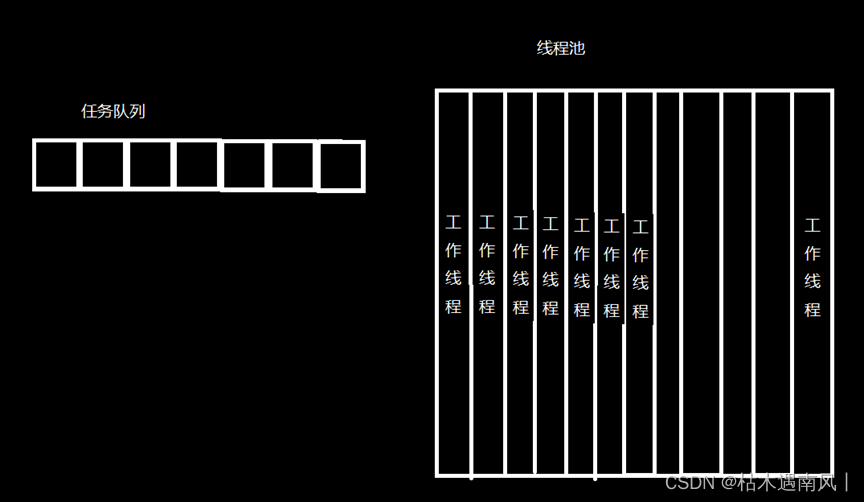

### 线程池的实现

1、创建线程池的基本结构：
```
    typedef struct Task;         //任务队列链表
    typedef struct ThreadPool;   //线程池结构体
```
2、线程池的初始化：
```
    pool_init() 
    {
            创建一个线程池结构；
            实现任务队列互斥锁和条件变量的初始化；
            创建n个工作线程；
    }
```
使用互斥锁是因为，任务队列链表是一个临界资源；  

3、线程池添加任务：
```
    pool_add_task 
    {
        判断是否有空闲的工作线程；
        给任务队列添加一个节点；
        给工作线程发送信号newtask
    }
```
4、实现工作线程：
```
    workThread 
    {
        while(1) 
        {
            等待newtask任务信号；
            从任务队列中删除节点；
            执行任务；
        }
    }
```
5、线程池的销毁：
```
    pool_destory 
    {
            删除任务队列链表的所有节点，释放空间；
            删除所有的互斥锁条件变量；
            删除线程池，释放空间；
    }
```

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <pthread.h>
#include <stdlib.h>
 
#define POOL_NUM 10
 
//1. 创建任务队列链表结构体;
typedef struct Task
{
	void *(*func)(void *arg); //任务--函数 函数指针, 参数为空指针 返回值为空指针
	void *arg;
	struct Task *next;  //指定下一任务的指针
}Task;
 
 
//2. 创建线程池结构体;
typedef struct ThreadPool 
{
	pthread_mutex_t taskLock;  //任务链表为临界资源,定义锁
	pthread_cond_t newTask;    //条件变量,条件设为有新任务
 
	pthread_t tid[POOL_NUM];   //线程池的pid
	Task *queue_head;          //线程池的头部
	int busywork;              //表示任务满的状态
}ThreadPool;
 
//线程池变量;
ThreadPool *pool;
 
//实现工作线程;
void *workThread(void *arg) 
{
	while (1) 
	{
		pthread_mutex_lock(&pool->taskLock);      //要访问工作队列,要加锁	
		pthread_cond_wait(&pool->newTask, &pool->taskLock);  //等待新任务条件,没有新任务就阻塞
		// 有新任务到来
		Task *ptask = pool->queue_head;           //新任务放到线程池中
		pool->queue_head = pool->queue_head->next;//任务节点指向下一个
		pthread_mutex_unlock(&pool->taskLock);
 
		ptask->func(ptask->arg)                   //工作线程执行的函数
		pool->busywork--;
	}
}
 
//被执行的工作内容
void *realwork(void *arg)
{
	printf("finish work %d\n", (int)arg);
}
 
//线程池添加任务;
void pool_add_task(int arg) 
{
	
	Task *newTask;
	pthread_mutex_lock(&pool->taskLock);
	//判断池是否是满的
	while(pool->busywork >= POOL_NUM)             //如果是满的 ,这个访问需要加锁
	{
		pthread_mutex_unlock(&pool->taskLock);
		usleep(10000);//休眠一会
		pthread_mutex_lock(&pool->taskLock);
	}
	pthread_mutex_unlock(&pool->taskLock);
 
	//创建一个新任务
	newTask = malloc(sizeof(Task));
	newTask->func = realwork;                     // 函数指针的使用
	newTask->arg = arg;
 
	//将新任务添加到任务队列;
	pthread_mutex_lock(&pool->taskLock);
	Task *member = pool->queue_head;              //线程池任务
	if (member == NULL) 
	{
		pool->queue_head = newTask;
	}
	else
	{
		while(member->next != NULL)               //任务队列的尾部
		{
			member = member->next;
		}
		member->next = newTask;
	}
 
	pool->busywork++;
	pthread_cond_signal(&pool->newTask);           //提示新任务来临
	pthread_mutex_unlock(&pool->taskLock);
}
 
 
//线程池初始化;
void pool_init()
{
	pool = malloc(sizeof(ThreadPool));             //对线程池分配空间
	pthread_mutex_init(&pool->taskLock, NULL);     //初始化线程锁
	pthread_cond_init(&pool->newTask, NULL);       //初始化条件变量
	pool->queue_head = NULL;                       //队列头部置为空
	pool->busywork = 0;                            //满任务标志为0
 
	//创建n个工作线程
	int i;
	for(i = 0; i < POOL_NUM; i++)
	{
		pthread_create(&pool->tid[i], NULL, workThread, NULL);
	}
}
 
//线程的销毁
void pool_destroy()
{
	Task *head;
	while(pool-> queue_head != NULL)
	{
		head = pool->queue_head;
		pool->queue_head = pool->queue_head->next;
		free(head);
	}
	pthread_mutex_destroy(&pool->taskLock);
	pthread_cond_destroy(&pool->newTask);
	free(pool);
}

int main() 
{
	// 3. 线程池初始化
	pool_init();   
	sleep(1);
	for (int i = 1; i < 20; i++) 
	{
		//4. 线程池增加任务
		pool_add_task(i);
	}
 
	sleep(5);
	// 5.线程池销毁 
	pool_destroy();
  
}

# 线程GDB调试

显示线程：

info thread

切换线程：

thread id

GDB为特定线程设置断点：

break location thread id

GDB设置线程锁：

set scheduler-locking on/off

on:其他线程会暂停，可以单独调试一个线程

# 进程间的通信

+ 概念：
进程间的通信就是进程和进程之间交换信息；  
+ 常用方式：  
无名管道（pipe）  
有名管道（fifo）  
信号（signal）  
共享内存（mmap）  
套接字（socket）  
+ 过时的IPC(进程间通讯)通信方式：  
共享内存（share memory）  
消息队列（message queue）  
信号灯集（semaphore set）  

## 无名管道

+ 什么是管道：  
  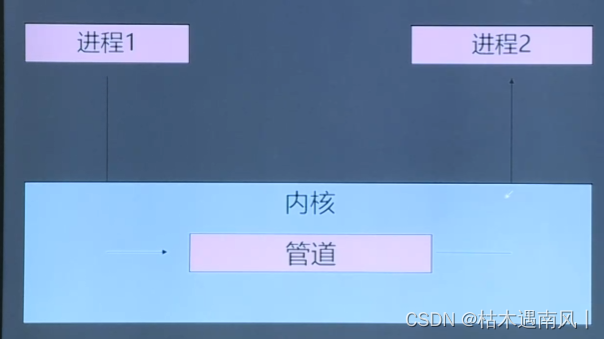
+ 无名管道的特点：  

  只能用于具有亲缘关系进程的进程之间通信；  

  单工的通信模式，一个管道只能在一个方向上传送数据；  

  无名管道创建时会返回两个文件描述符，分别用于读写管道；  

### 无名管道的创建
```C
    #include <unistd.h>
    int pipe(int pfd[2]);
```
成功时返回0，失败时返回EOF  

pfd包含两个元素的整形数组，用来保存文件描述符；  
pfd[0]用于读管道；pfd[1]用于写管道；  

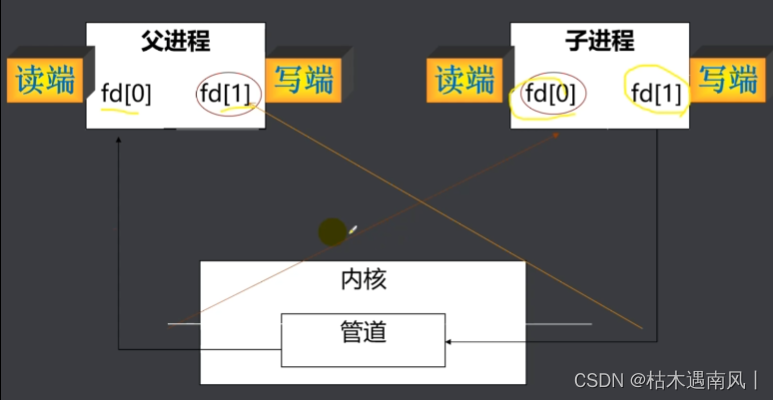

父子进程之间通信

In [ ]:
//无名管道的简单实现
#include <stdio.h>
#include <unistd.h>
#include <string.h>
 
int main() 
{
	int pfd[2];       //pfd[0]读管道，pfd[1]写管道
	int re;
	pid_t pid;
	char buf[20] = {0};
 
	//创建无名管道
	re = pipe(pfd);
	if (re < 0) 			//管道创建失败
    {
		perror("pipe");
		return 0;
	}
 
	//创建进程
	pid = fork();
	if (pid < 0) 
    {
		perror("fork");
		return 0;
	}
    else if (pid == 0) //子进程
    {
		while(1) 
        {
			strcpy(buf, "hahahaha");//将一串字符复制到buf
			write (pfd[1], buf, strlen(buf));//将buff中的内容写到写端  
			sleep(1);
		}
 
	}
    else               //父进程
    {
		while(1) 
        {
			re = read (pfd[0], buf, 20);//从buf中读取20个字符到读端
			if (re > 0) 
            {
			    printf("read pipe=%s\n", buf);
			}
		}
 
	}
}

In [2]:
#include<sys/types.h>
#include<unistd.h>
#include<stdio.h>
#include<stdlib.h>
#include<string.h>

int main()
{
    int fd[2];
    pid_t pid;
    char buf[64] = "I'm parent process!\n";
    char line[64];
    
    if(pipe(fd) != 0)
    {
        fprintf(stderr, "Fail to create pipe!\n");
        return 0;
    }
    pid = fork();
    if(pid < 0)
    {
        fprintf(stderr, "Fail to create process!\n");
        return 0;
    }
    else if(pid == 0)
    {
        close(fd[0]);   // 关闭读管道，使得父进程只能向管道写入数据
        write(fd[1], buf, strlen(buf));  //写数据到管道
        close(fd[1]);  //关闭写管道
    }
    else
    {
        close(fd[1]);   //关闭写管道，使得子进程只能从管道读取数据
        read(fd[0], line, 64);
        printf("Data from parent: %s", line);
        close(fd[0]);  //关闭读管道
    }
    return 0;
}

管道打开与关闭的图示：

父进程创建管道：  
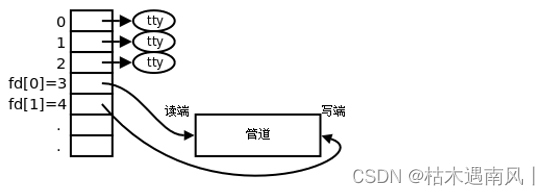  
 父进程fork出子进程：  
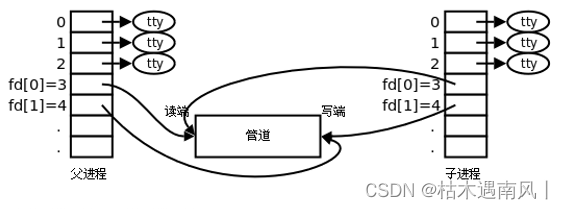  
 父进程关闭fd[0]，子进程关闭fd[1]  
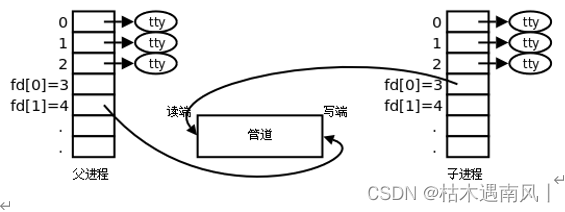  

父子进程的读写管道各自独立

多个进程之间通信

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <string.h>
int main()
{
    int pfd[2];
    int i;
    int re;
    char buf[40]={0};
    pid_t pid;

    re = pipe(pfd);
    if(re < 0)
    {
        perror("pipe");
        return 0;
    }
    printf("%d,%d\n",pfd[0],pfd[1]);
/*
i = 0 父行程创建出子进程 子进程pid=0 子进程退出循环,此时对应第一个子进程 父进程继续循环 i=1
i = 1 父进程再次创建出第二个子进程 子进程退出循环,此时对应第二个子进程 父进程继续循环 i=2
i = 2 循环退出
*/
    for(i=0; i < 2; i++)//创建两个子进程
    {
        pid = fork();//父进程返回子进程的进程号,子进程返回0
        if(pid < 0)
        {
            perror("fork");
            return 0;
        }
        else if(pid > 0)
        {

        }
        else        // pid == 0 i=0 子进程进行到这
        {
            break;  //子进程打断,不再fork,退出后i可能=0 /1 /2     
        }
    }

    if(i==2)   
    {
        close(pfd[1]); //父进程关闭写
        while(1)
        {
            memset(buf,0,40);
            re=read(pfd[0],buf,40);
            if(re>0)
            {
                printf("%s\n",buf);
            }    
        }
        return 0;
    }
    if(i==1)
    {
        close(pfd[0]);  // 子进程2关闭读
        while(1)
        {
            strcpy(buf,"this is 2 process");
            write(pfd[1],buf,strlen(buf));
            usleep(930000); // 时间错开,避免管道同时出现两个进程内容
        }
        return 0;
    }
    if(i==0)           //
    {
        close(pfd[0]); // 子进程1关闭读
        while(1)
        {
            strcpy(buf,"this is 1 process"); // 将信息复制到buff缓冲
            write(pfd[1],buf,strlen(buf));//通过写将内容传到管道另一头
            sleep(1);
        }

        return 0;
    }
}

+ 无名管道注意事项：  

1、只能用于亲缘关系的进程间通信；  
2、管道通信是单工的，一端读，一端写，（程序实现时设计好的）  
3、数据自己读不能自己写；  
4、管道可以用于大于2个进程共享；  

  



> 无名管道的读写特性：  

+ 读管道：
  
1、管道中有数据，read返回实际读到的字节数；  
2、管道中无数据：  
        （1）管道写端被全部关闭，read返回0（好像读到文件结尾）  
        （2）写段没有全部被关闭，read阻塞等待（不就的将来可能有数据抵达，此时会让出cpu）
        

        

1. 读管道读写特性演示

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <string.h>
#include <stdlib.h>
#include <pthread.h>

#define ALLWRITEPCLOSE
//#define ONEWRITEPCLOSE1
//#define ONEWRITEPCLOSE2

int main()
{
    int pfd[2];
    int re;
    char buf[20]={0};
    pid_t pid;
    /*创建无名管道*/
    re = pipe(pfd);
    if(re < 0)
    {
        perror("pipe");
        return 0;
    }

    printf("%d,%d\n",pfd[0],pfd[1]);  //pfd[0]=3  pfd[1]=4 
    /*创建进程*/
    pid = fork();
    if(pid < 0)  //创建进程失败
    {
        perror("fork");
        return 0;
    }
    else if(pid > 0)  //父进程
    {

        close(pfd[0]);  //关闭读，让父进程只负责写
#ifdef ALLWRITEPCLOSE
        close(pfd[1]);  //关闭写
        //如果把写管道全部关闭 则子进程程序read无阻塞,会一直打印re=0
        //如果没有关闭,程序会一直打印read pipe=hhahahahah
#endif
#ifdef ONEWRITEPCLOSE1
        close(pfd[1]);  //关闭写
        //如果只关闭一个写管道,则子进程会阻塞在read上
        
#endif
        while(1)
        {
            strcpy(buf, "hhahahahah");
            write(pfd[1], buf, strlen(buf));  //向写管道写入
            sleep(1);
        }

    }
    else   //子进程
    {

#ifdef ALLWRITEPCLOSE
        close(pfd[1]);   //关闭写
#endif
#ifdef ONEWRITEPCLOSE2
        close(pfd[1]);   //关闭写
#endif

        while(1)
        {
            re = read(pfd[0], buf, 20);

            if(re > 0)             //管道中有数据
            {
                printf("read pipe=%s\n",buf);
            }
            else if(re == 0)      //管道中没有数据
            {
                printf("re=0\n");
            }
        }
    }
}

+ 写管道：
    
1、管道读端全部被关闭，进程异常终止（也可以使用捕捉SIGPIPE信号 ，使进程不终止）  
2、管道读端没有全部关闭：  
        （1）管道已满，write 阻塞（管道大小64k）；  
        （2）管道未满，write 将数据写入，并返回实际写入的字节数； 

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <string.h>
#include <stdlib.h>

//#define ALLREADCLOSE
#define ONEREADCLOSE1
//#define ONEREADCLOSE2

int main()
{
    int pfd[2];
    int re;
    char buf[20]={0};
    pid_t pid;
    
    re = pipe(pfd);
    if(re < 0)
    {
        perror("pipe");
        return 0;
    }
    printf("%d,%d\n", pfd[0], pfd[1]);
    
    pid = fork();
    if(pid < 0)
    {
        perror("fork");
        return 0;
    }
    else if(pid > 0)   //父进程
    {

#ifdef ALLREADCLOSE
        close(pfd[0]); 
#endif
#ifdef ONEREADCLOSE2
        close(pfd[0]);  //程序循环打印
#endif

        while(1)
        {
            strcpy(buf,"hhahahahah");
            write(pfd[1], buf, strlen(buf));  //向写端写入数据
            sleep(1);
        }
    }
    else   //子进程
    {
        close(pfd[1]);  //关闭写端

#ifdef ALLREADCLOSE     //所有读端都关闭，程序异常中止
        close(pfd[0]);  
#endif
#ifdef ONEREADCLOSE1
        close(pfd[0]);   //程序阻塞
#endif
        while(1)
        {
            re = read(pfd[0], buf, 20);
            if(re > 0)
            {
                printf("read pipe=%s\n",buf);
            }
            else if(re == 0)
            {
                printf("re=0\n");
            }
        }
    }
}

In [ ]:
#include <stdio.h>
#include <unistd.h>
#include <string.h>
#include <stdlib.h>
int main()
{
    int pfd[2];
    int re;
    char buf[20]={0};
    
    pid_t pid;
    re = pipe(pfd);
    if(re<0)
    {
        perror("pipe");
        return 0;
    }
    printf("%d,%d\n",pfd[0],pfd[1]);
    
    pid = fork();
    if(pid<0)
    {
        perror("fork");
        return 0;
    }
    else if(pid>0)
    {
        close(pfd[0]);
        int j=0;
        while(1)
        {
            j++;
            strcpy(buf,"hhahahahah");  //10个字节
            for(int i=0;i<1000;i++)
            {
                write(pfd[1],buf,strlen(buf));
            }
            printf("write %d times\n",j);//会打印6次共64kb
            sleep(1);
        }

    }
    else
    {
        close(pfd[1]); 
        sleep(30000);  //等待父进程先把工作做完
        exit(0);
        while(1)
        {
            re=read(pfd[0],buf,20);
            if(re>0)
            {
                printf("read pipe=%s\n",buf);
            }
            else if(re==0)
            {
                printf("re=0\n");
            }
        }
    }
}

## 有名管道
通过管道文件进行交互

有名管道的特点：

1、有名管道可以是非亲缘的两个进程互相通信；  
2、通过路径名来操作，在文件系统中可见，但内容存放在内存中；  
3、文件IO来操作有名管道；  
4、遵循先进先出规则；  
5、不支持leek操作；  
6、单工读写；  

### 创建管道：
```C
    #include <sys/types.h>
    #include <sys/stat.h>
    int mkfifo(const char *filename, mode_ mode);
```
成功时返回0，失败返回EOF；  
path 创建的管道文件路径；  
mode 管道文件的权限，如0666；  

### 有名管道的打开：

只读方式

```c
    open(const char *path, O_RDONLY);             //阻塞
    open(const char *path, O_RDONLY | O_NONBLOCK);//非阻塞
```

只写方式

```c
    open(const char *path, O_WRONLY);
    open(const char *path, O_WRONLY | O_NONBLOCK);
```

In [ ]:
// 向管道文件中写
#include <sys/types.h>
#include <sys/stat.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <fcntl.h>
#include <string.h>


int main()
{
    int re;
    int fd;
    char buf[32];
    re = mkfifo("/myfifo",0666);               //文件名(不要建立在共享目录下) 权限
    if(re<0)
    {
        perror("mkfifo");
    }
    //创建的fifo权限前会增加一个p 表示这是一个管道文件
    fd = open("/myfifo",O_WRONLY|O_NONBLOCK);  //需要使用文件IO
    if(fd<0)
    {
        perror("open");
        return 0;
    }
    printf("after open\n");
    while(1)
    {
        fgets(buf,32,stdin);   // 将标准IO中的内容输入到buf
        write(fd,buf,strlen(buf));  //将Buf 写到管道

    }
}

In [ ]:
// 从管道文件中读
#include <sys/types.h>
#include <sys/stat.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <fcntl.h>
#include <string.h>


int main()
{
    int re;
    int fd;
    char buf[32];

    fd = open("/myfifo",O_RDONLY);
    if(fd<0)
    {
        perror("open");
        return 0;
    }
    printf("after open\n");
    while(1)
    {
        re=read(fd,buf,32);
        if(re>0)
        {
            printf("read fifo=%s\n",buf);
        }
        else if(re==0)//如果管道关闭
        {
            exit(0);
        }

    }
}

有名管道注意事项

1. 程序不能以O_RDWR（读写）模式打开FIFO文件进行读写操作

2. 对于以只读方式（O_RDONLY）打开的FIFO文件
   如果open调用是阻塞的（即第二个参数为O_RDONLY），除非有一个进程以写方式打开同一个FIFO，否则他不会返回；
   
   如果open调用是非阻塞的（即第二个线束为O_RDONLY | O_NONBLOCK）， 则即使没有其他进程以写方式打开同一个FIFO文件，open调用将成功并立即返回。

3. 对于以只写方式(O_WRONLY)打开的FIFO文件
   如果open调用是阻塞的（即第二个参数为O_WRONLY），open调用将被阻塞，直到有一个进程以只读方式打开同一个FIFO文件为止；
   如果open调用是非阻塞（即第二个参数为O_WRONLY | O_NONBLOCK）,open总会立即返回，但如果没有其他进程以只读方式打开同一个人FIFO文件，open调用将返回-1，并且FIFO也不会被打开；

4. 数据完整性，如果有多个进程写同一个管道，使用O_WRONLY方式打开通道，如果写入的数据长度小于等于PIPE_BUG（4K），要么写入全部字节，要么一个字节都不写入，系统就可以确保数据绝不会交错在一起。

## 内存映射

概念：

功能:  
共享内存可以通过mmap（）映射普通文件。  
是一个磁盘文件与内存中的一个缓冲区相映射，进程可以像访问普通内存一样对文件进行访问，不必在调用read 、write。
(让磁盘文件直接去复制内存一块区域的内容,只要改这块内存的内容,就能实现对文件内容的更改)
(在内存中搞一个模具,磁盘文件直接照着模具出轮廓)  
mmap（）的优点：  
实现了用户空间和内核空间的高效交互方式；  
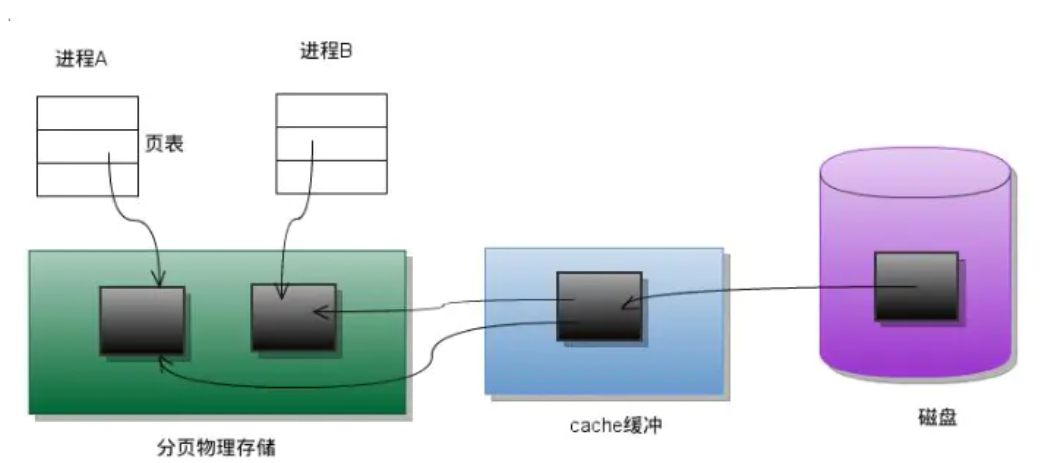  
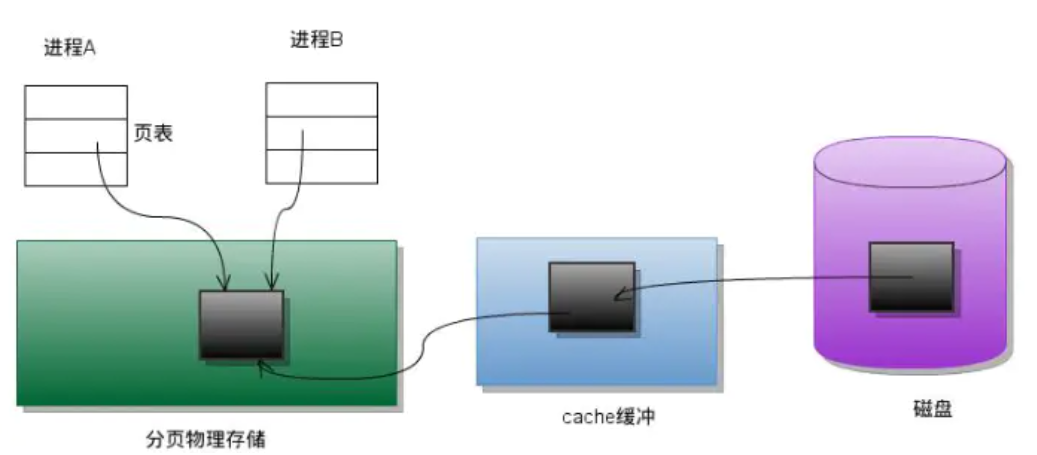  

创建内存映射

```c
void *mmap(void *addr,
           size_t length, 
           int prot, 
           int flags, 
           int fd, 
           off_t offset);
```

功能：创建内存映射；
函数返回值：成功返回创建的映射区首地址，失败返回MAP_FAILED（（(void*) -1）），设置error值；

参数说明：
+ addr:指定要映射的内存地址，一般设置为NULL 让操作系统选择合适的内存地址。(让操作系统来给你找哪块合适)
+ length：必须 > 0 。映射空间的字节数，它从被映射文件开头offset个字节开始算起。(要整的模具的大小)
  
+ prot：指定共享内存的访问权限。可取如下几个值：  
        + PROT_READ（可读）,   
        + PROT_WRITE（可写）,   
        + PROT_EXEC（可执行）,    
        + PROT_NONE（不可访问）。  
+ flags：有以下几个常值指定：    
        + MAP_SHARED（共享的）、  
        + MAP_PRIVATE（私有的）、  
        + MAP_FIXED（表示必须使用start参数作为开始地址，如果失败不进行修正），    
其中，MAP_SHARED,MAP_PRIVATE必选其一，而MAP_FIXED则不推荐使用。  
        + MAP_ANONYMOUS（匿名映射，用于血缘关系进程间通信）  

+ fd：表示要映射 的文件句柄。如果匿名映射写-1；(让磁盘哪个文件来复制)
+ offset：表示要映射文件的偏移量，一般设置为0表示从文件头部开始映射。(从哪一块区域开始复制)  

In [ ]:
#include <sys/mman.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>


int main()
{    
    void *addr;
    int fd;                              //需要打开一个文件,让内存来映射
    //fd = open("test",O_RDONLY);        //这里注意文件打开权限,不能比内存映射区域的权限小,详见注意事项2
    fd = open("test",O_RDWR);            //以读写权限打开
    if(fd<0)
    {
        perror("open");
        return 0;
    }
    
    addr = mmap(NULL, 100, PROT_READ|PROT_WRITE, MAP_SHARED, fd, 0); //整100个字节大小的映射区
    if(addr == MAP_FAILED)
    {
        perror("mmap");
        return 0;
    }
    close(fd); //即使文件关闭也没有关系
    memcpy(addr,"abcdefg",7);
    printf("read=%s\n",(char*)(addr));
}

内存映射使用注意事项:   
（1） 创建映射区的过程中，隐含着一次对映射文件的读操作，将文件内容读取到映射区。  
（2） 当MAP_SHARED时，要求：映射区的权限应 <= 文件打开的权限(出于对映射区的保护)，如果不满足报非法参数（Invalid argument）错误。  
     当MAP_PRIVATE时候，mmap中的权限是对内存的限制，只需要文件有读权限即可，指定私有了之后操作只在内存有效，不会写到物理磁盘，且不能在进程间共享。  
（3） 映射区的释放与文件关闭无关，只要映射建立成功，文件可以立即关闭。  
（4） 用于映射的文件大小必须>0，当映射文件大小为0时，指定非0大小创建映射区，访问映射地址会报总线错误，指定0大小创建映射区，报非法参数错误（Invalid argument）  
（5） 文件偏移量必须为0或者4K的整数倍（不是会报非法参数Invalid argument错误)(内存按页进行管理,一个页的大小为4k)
（6） 映射大小可以大于文件大小，但只能访问文件page的内存地址，否则报总线错误 ，超出映射的内存大小报段错误   
即使文件大小比4k小,也会按4k的大小为单位进行内存分配供申请  
如果申请了2k空间,实际访问3k空间,这可以允许  
但如果申请了6k空间,实际访问5k空间,则会报错
系统还是根据文件内容大小来分配的,如果文件根本用不到4k大小,系统也只分配4k给你,超出这个4k访问就会出错  
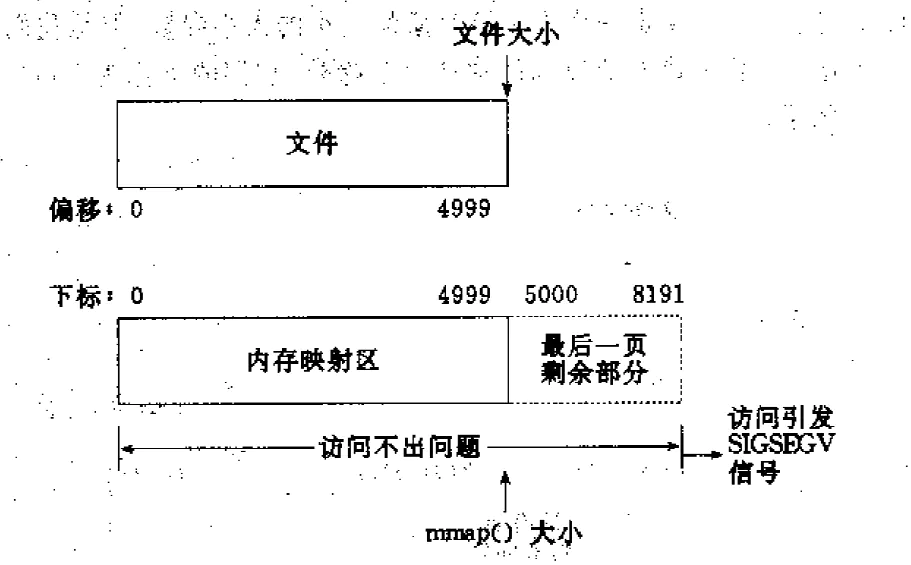  
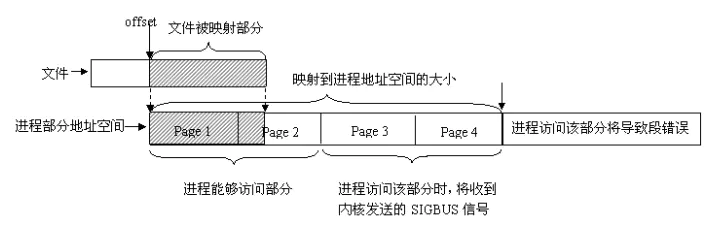  
（7） mmap创建映射区出错概率非常高，一定要检查返回值，确保映射区建立成功再进行后续操作。

In [ ]:
#include <sys/mman.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>


int main()
{
    
    void *addr;
    int fd;                              
    fd =open("test",O_RDWR);
    if(fd<0)
    {
        perror("open");
        return 0;
    }
    
    int len = lseek(fd,0,SEEK_END);   // 取文件大小  文件大小不能为0
    //addr = mmap(NULL,len, PROT_READ|PROT_WRITE, MAP_SHARED, fd, 0);
    addr = mmap(NULL,2048, PROT_READ|PROT_WRITE, MAP_SHARED, fd, 0);
    
    if(addr == MAP_FAILED)
    {
        perror("mmap");
        return 0;
    }
    close(fd);
    int i=0;
    while(i<2048)
    {
        memcpy((addr+i),"a",1);
        i++;
        sleep(1);
    }    
//    printf("read=%s\n",(char*)(addr));
}

### 内存映射实现进程通讯

1. 基于文件的映射  
分别运行以下两个程序可以实现两个进程间的通讯

In [ ]:
//写进程,每一秒向内存区写一个字符a
#include <sys/mman.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>


int main()
{    
    void *addr;
    int fd;
    fd =open("test",O_RDWR);
    if(fd<0)
    {
        perror("open");
        return 0;
    }
    int len = lseek(fd,0,SEEK_END);    
    addr = mmap(NULL,2048, PROT_READ|PROT_WRITE, MAP_SHARED, fd, 0);
    if(addr == MAP_FAILED)
    {
        perror("mmap");
        return 0;
    }
    close(fd);

    while(i<2048)
    {
        memcpy((addr+i),"a",1);
        i++;
        sleep(1);
    }
}

In [ ]:
//读进程,不停地从内存地址读取字符a
#include <sys/mman.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>


int main(){
    
    void *addr;
    int fd;
    fd =open("test",O_RDWR);
    if(fd<0){
        perror("open");
        return 0;
    }
    int len = lseek(fd,0,SEEK_END);    
    addr = mmap(NULL,2048, PROT_READ|PROT_WRITE, MAP_SHARED, fd, 0);
    if(addr == MAP_FAILED){
        perror("mmap");
        return 0;
    }
    close(fd);
    while(1){
        printf("read=%s\n",(char*)(addr));
        sleep(1);
    }


}

2. 匿名映射  
适用于具有亲缘关系的进程之间，相当于无名管道

In [ ]:
#include <sys/mman.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <sys/wait.h>

int main(){

    void *addr;
    
    addr = mmap(NULL,2048, PROT_READ|PROT_WRITE, MAP_SHARED|MAP_ANONYMOUS, -1, 0);//匿名映射
    if(addr == MAP_FAILED)
    {
        perror("mmap");
        return 0;
    }
    
    pid_t pid;
    pid = fork();    //创建父子进程

    if(pid<0)
    {
        perror("fork");
        return 0;
    }
    else if(pid>0)   //父进程
    {
        memcpy(addr,"1234567890",10);         
        wait(NULL); //等待子进程的回收
    }
    else            // 子进程 
    {
        sleep(1);
        printf("read father val=%s\n",(char *)addr);
    }
}

### 释放内存映射

munmap函数
```
int munmap(void *addr, size_t length);
```
返回值：成功返回0，失败返回-1，并设置errno值  
函数参数：  
addr：调用mmap函数成功返回的映射区首地址  
length：映射区大小（即：mmap函数的第二个参数）  

In [ ]:
#include <sys/mman.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <sys/wait.h>

int main(){

    void *addr;
    
    addr = mmap(NULL,2048, PROT_READ|PROT_WRITE, MAP_SHARED|MAP_ANONYMOUS, -1, 0);
    if(addr == MAP_FAILED){
        perror("mmap");
        return 0;
    }
    pid_t pid;
    pid = fork();

    if(pid<0){
        perror("fork");
        return 0;
    }
    else if(pid>0){
        memcpy(addr,"1234567890",10);
         
        wait(NULL);
    }else {
        sleep(1);
        printf("read father val=%s\n",(char *)addr);

        

    }
    
    munmap(addr,2048);  // 释放内存映射

}

## System V共享内存

解释:  
每个进程通讯IPC对象都有唯一的ID,这些进程对象用Key关联  
IPC对象创建后一直存在，直到被显式地删除  
可以使用命令 ipcs / ipcrm 来查看共享内存和删除共享内存

system V 共享内存使用步骤：  
1. ftok函数创建Key  
2. 创建/打开共享内存  
3. 映射共享内存，即把指定的共享内存映射到进程的地址空间用于访问  
4. 读写共享内存  
5. 撤销共享内存映射  
6. 删除共享内存对象  

1. ftok函数生成key
```c
 #include  <sys/types.h>
 #include <sys/ipc.h>
 key_t  ftok(const char *path,  int proj_id);
```
参数:  
path是指定的文件名，这个文件必须是存在的而且可以访问的。  
id是用于生成key的数字，它是一个8bit的整数。即范围是0~255。  

当函数执行成功，则会返回key_t键值，否则返回-1。  
在一般的UNIX中，通常是将文件的索引节点取出，然后在前面加上子序号就得到key_t的值  

In [6]:
#include <sys/types.h>
#include <sys/ipc.h>
#include <stdio.h>
#include <sys/shm.h>
#include <string.h>

int main()
{
    key_t key;
    int shmid;
    char *buf;
    
    key = ftok("keytest",100);
    if(key<0)
    {
        perror("ftok");
        return 0;
    }
    printf("key=%d\n",key);    
}

key=1678386140


In [7]:
#include <stdio.h>
#include <stdlib.h>
#include <sys/types.h>  
#include <sys/ipc.h>
#include <unistd.h>
int main(int argc, char *argv[]) 
{
   key_t key;
   if ((key = ftok("keytest", 'a')) == -1) 
   {
      perror("key");
      exit(-1);
   }   
    printf("key=%d\n",key);
}

共享内存创建shmget
```
#include <sys/ipc.h>
#include <sys/shm.h>
int shmget(key_t key, int size, int shmflg);
```
成功时返回共享内存的id，失败时返回EOF   
key  和共享内存关联的key  IPC_PRIVATE 或 ftok生成   
size 创建共享内存的大小   
shmflg 共享内存标志位  IPC_CREAT|0666  

In [5]:
//要求：创建一个私有的共享内存，大小为512字节，权限为0666
#include <stdio.h>
#include <stdlib.h>
#include <sys/types.h>  
#include <sys/ipc.h>
#include <sys/shm.h>
#include <unistd.h>
int main(int argc, char *argv[]) 
{
   int shmid;
   if ((shmid = shmget(IPC_PRIVATE, 512, 0666)) < 0) 
   {
      perror("shmget");
      exit(-1);
   }
   printf("shmid=%d\n",shmid);
}

shmid=131121


In [9]:
//要求：创建/打开一个和key关联的共享内存，大小为1024字节，权限为0666
#include <stdio.h>
#include <stdlib.h>
#include <sys/types.h>  
#include <sys/ipc.h>
#include <sys/shm.h>
#include <unistd.h>
int main(int argc, char *argv[]) 
{
  key_t key;
  int shmid;

  if ((key = ftok("keytest", 'm')) == -1) 
  {
     perror("ftok");
     exit(-1);
  }
  if ((shmid = shmget(key, 1024, IPC_CREAT|0666)) < 0) 
  {
     perror("shmget");
     exit(-1);
  }
  printf("key=%d\n",key);
  printf("shmid=%d\n",shmid);
}
  

key=1829381084
shmid=163874


共享内存映射 shmat
```
#include <sys/ipc.h>
#include <sys/shm.h>
void  *shmat(int shmid, const void *shmaddr, int shmflg);
```
成功时返回映射后的地址，失败时返回(void *)-1  
shmid   要映射的共享内存id  
shmaddr   映射后的地址， NULL表示由系统自动映射  
shmflg   标志位  0表示可读写；SHM_RDONLY表示只读  

In [ ]:
// 共享内存的读写
// 通过指针访问共享内存，指针类型取决于共享内存中存放的数据类型
// 例如：在共享内存中存放键盘输入的字符串 
#include <stdio.h>
#include <stdlib.h>
#include <sys/types.h>  
#include <sys/ipc.h>
#include <sys/shm.h>
#include <unistd.h>
int main(int argc, char *argv[]) 
{
   key_t key;
   int shmid;

   if ((key = ftok("keytest", 'm')) == -1) 
   {
     perror("ftok");
     exit(-1);
   }
   if ((shmid = shmget(key, 1024, IPC_CREAT|0666)) < 0) 
   {
     perror("shmget");
     exit(-1);
   }
   char *addr;
   if ((addr = (char *)shmat(shmid, NULL, 0)) == (char *)-1) 
   {
      perror(“shmat”);
      exit(-1);
   }
   fgets(addr, N, stdin);
}

共享内存撤销shmdt  
```
 #include <sys/ipc.h>
 #include <sys/shm.h>
 int  shmdt(void *shmaddr);
```
撤销后，内存地址不可在访问。  
成功时返回0，失败时返回EOF    
不使用共享内存时应撤销映射  
进程结束时自动撤销  

共享内存控制shmctl  
```
#include <sys/ipc.h>
#include <sys/shm.h>
int  shmctl(int shmid, int cmd, struct shmid_ds *buf);

```
成功时返回0，失败时返回EOF    
shmid   要操作的共享内存的id  
cmd   要执行的操作  IPC_STAT  IPC_SET  IPC_RMID  
```
shmctl(shmid, IPC_RMID, NULL);   //删除共享内存
```
buf   保存或设置共享内存属性的地址 

注意事项      
每块共享内存大小有限制  
  ipcs  -l  
  cat  /proc/sys/kernel/shmmax
共享内存删除的时间点  
添加删除标记  
nattach 变成0时真正删除  


通过下面代码实验使用共享内存实现进程通讯

In [ ]:
//向共享内存中写
#include <sys/types.h>
#include <sys/ipc.h>
#include <stdio.h>
#include <sys/shm.h>
#include <string.h>

int main()
{
    key_t key;
    int shmid;
    char *buf;
   //生成key 
    key = ftok("keytest",100);
    if(key<0)
    {
        perror("ftok");
        return 0;
    }
    printf("key=%x\n",key);
    //创建和key关联的共享内存
    shmid = shmget(key,512,IPC_CREAT|0666);
    if(shmid<0)
    {
        perror("shmget");
        return 0;
    }
    printf("shmid=%d\n",shmid);
    //将共享内存映射到buf
    buf = shmat(shmid,NULL,0);
    if(buf<0)
    {
        perror("shmat");
        return 0;
    }
    //复制字符串到buf
    strcpy(buf,"hello world");   
}

In [ ]:
//从共享内存中读
#include <sys/types.h>
#include <sys/ipc.h>
#include <stdio.h>
#include <sys/shm.h>
#include <string.h>
#include <unistd.h>

int main()
{
    key_t key;
    int shmid;
    char *buf;
    
    key = ftok("keytest",100);
    if(key<0)
    {
        perror("ftok");
        return 0;
    }
    printf("key=%x\n",key);

    shmid = shmget(key,512,0666);

    if(shmid<0)
    {
        perror("shmget");
        return 0;
    }    
    printf("shmid=%d\n",shmid);
   
    buf = shmat(shmid,NULL,0);
    if(buf<0)
    {
        perror("shmat");
        return 0;
    }    
    //打印共享内存的内容
    printf("share mem=%s\n",buf);
    while(1)
    {
        sleep(1); //给打印留点时间
    }    
    shmdt(buf);  //共享内存撤销
    shmctl(shmid, IPC_RMID, NULL);//删除共享内存
    printf("detach mem=%s\n",buf);//可以验证共存撤销后buf是否还能获得内容

}

## 信号机制

概念，信号的产生，信号处理方式，常用信号
> 概念：  

信号是软件层次上对中断机制的一种模拟，是一种异步通信方式，所有信号的产生及处理都是有内核完成的。    

Linux内核通过信号通知用户进程，不同的信号类型代表不同的事件   

Linux对早期的unix信号机制进行了扩展  
 

> 信号的产生： 
 
1.按键产生；       
2.系统调用函数产生（比如raise、kill）  
3.硬件异常；       
4.命令行产生（kill）  
5.软件条件（比如被0除，访问非法内存等）  

> 信号处理方式：  

1. 缺省方式；  
2. 忽略信号；   
3. 捕捉信号；  

> 常用信号:  

| 信号名 | 含义 | 默认操作 |
| ------- | ---------------- | ---- |
| SIGHUP | 该信号在用户终端关闭时产生，通常是发给和该终端关联的会话内的所有进程 | 终止 |
| SIGINT | 该信号在用户键入INTR字符(Ctrl-C)时产生，内核发送此信号送到当前终端的所有前台进程 | 终止 |
| SIGQUIT | 该信号和SIGINT类似，但由QUIT字符(通常是Ctrl-\)来产生 | 终止 |
| SIGILL | 该信号在一个进程企图执行一条非法指令时产生 | 终止 |
| SIGSEV | 该信号在非法访问内存时产生，如野指针、缓冲区溢出 | 终止 |
| SIGPIPE | 当进程往一个没有读端的管道中写入时产生，代表“管道断裂” | 终止 |
| SIGKILL | 该信号用来结束进程，并且不能被捕捉和忽略 | 终止 | 
| SIGSTOP | 该信号用于暂停进程，并且不能被捕捉和忽略 | 暂停进程 |
| SIGTSTP | 该信号用于暂停进程，用户可键入SUSP字符(通常是Ctrl-Z)发出这个信号 | 暂停进程 |
| SIGCONT | 该信号让进程进入运行态 | 继续运行 |
| SIGALRM | 该信号用于通知进程定时器时间已到 | 终止 |
| SIGUSR1/2 | 该信号保留给用户程序使用 | 终止 |
| SIGCHLD | 是子进程状态改变发给父进程的 | 忽略 |

### 内核信号命令：

```c
kill[-signal]pid
```
默认发送SIGTERM   

- signal 可指定信号  
- pid  指定发送对象  

```c
kill -l 显示出所有支持的信号及其代号  
```

```c 
killall [-u user | prog]
```

- prog  指定进程名 
- user  指定用户名  

### 信号的发送

```c
int kill (pid_t pid, int signum);
```

功能：发送信号
成功时返回0，失败时返回EOF  
参数：    
pid :   
1. 0时，发送信号给指定进程；  
2. =0 时，发送信号给调用kill函数的那个进程处于同一进程组的进程；
3. <-1时，取绝对值，发送信号给该绝对值所对应的进程组的所有成员；
4. = -1时，发送信号给有权限发送的所有进程；
5. signum：待发送信号

```c
int raise（int sig）
```
给自己发信号，等价于kill(getpid(),signo);

### 定时器函数:  

1. alarm定时函数
```c
unsigned int alarm(unsigned int seconds);
```
功能：定时发送SIGALRM给当前进程；  
参数：seconds ，定时秒数；
返回值：上次定时剩余时间；  

2. pause函数(暂停）
```c
int pause(void);  
```
功能: 进程一直阻塞，直到被信号中断；
返回值: 被信号中断后返回-1，error为EINTR；

3. ualarm函数（循环发送）
```c
useconds_t ualarm(useconds_t usecs, useconds_t interval);
```

功能: 以useconds为单位，第一个参数为第一次产生时间，第二个参数为间隔产生；

4. setitimer函数  
```c
int setitimer(int which, const struct itimerval *new_value, struct itimerval *old_value);
```
功能：定时的发送alarm信号

参数：
which：
ITIMER_REAL：以逝去时间递减。发送SIGALRM信号
ITIMER_VIRTUAL: 计算进程（用户模式）执行的时间。 发送SIGVTALRM信号
ITIMER_PROF: 进程在用户模式（即程序执行时）和核心模式（即进程调度用时）均计算时间。 发送SIGPROF信号

new_value：负责设定 timout 时间                 
old_value：存放旧的timeout值，一般指定为NULL  

In [ ]:
#include <sys/types.h>
#include <signal.h>
#include <unistd.h>
int main()
{    
   kill(24149,11);//给别的进程发送信号
   raise(11);//给自己发信号
   alarm(3);//定时器
   pause();//暂停
   while(1)//while用来阻塞以让alarm完全进行/可以用pause替换
   {   

   }
}

In [ ]:
#include <stdio.h>  
#include <stdlib.h>
#include <unistd.h>
int main() 
{
   alarm(3);
   pause();
   printf(“I have been waken up!\n”);
   return 0;
}

### 信号的捕捉   
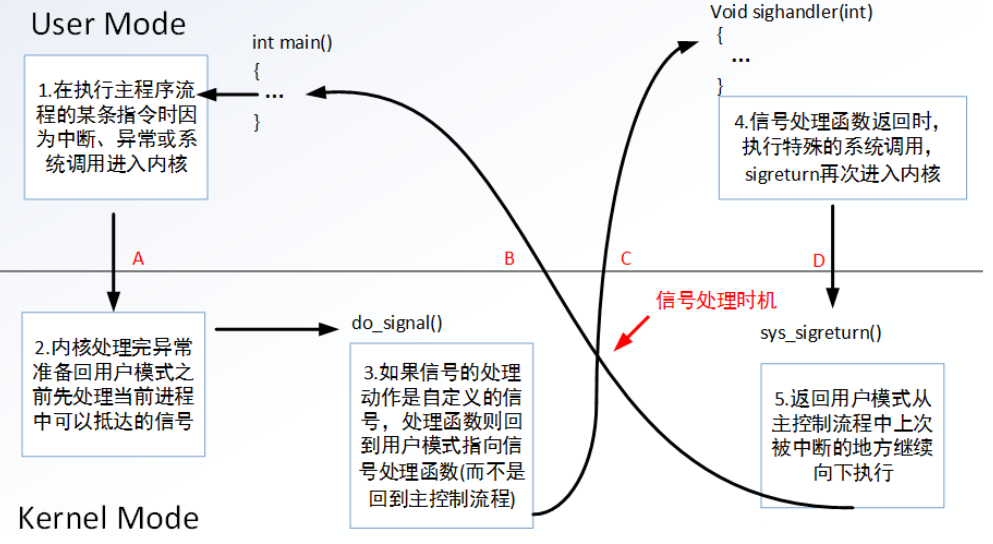

信号捕捉过程：  
    1. 定义新的信号的执行函数handle。  
    2. 使用signal/sigaction 函数，把自定义的handle和指定的信号相关联。  

signal函数：

```c
#include  <unistd.h>
#include <signal.h>

void (* signal(int signo, void (*handler)(int)) ) (int);  
//表示 signal 函数的返回值是一个函数指针，这个函数指针指向的函数接受一个 int 类型的参数并且没有返回值。这个返回的函数指针实际上是之前为 signo 信号设置的处理函数

typedef void (*sighandler_t)(int);   //定义函数指针变量，名称为sighandler_t
// 上面的定义变成如下形式：
sighandler_t signal(int signum, sighandler_t handler);
```

功能：捕捉信号执行自定义函数
返回值：成功时返回原先的信号处理函数，失败时返回SIG_ERR
参数：
- signo 要设置的信号类型
- handler 指定的信号处理函数: SIG_DFL代表缺省方式; SIG_IGN 代表忽略信号;  

系统建议使用sigaction函数，因为signal在不同类unix系统的行为不完全一样。

In [ ]:
#include <signal.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>
#include <linux/posix_types.h>

typedef void (*sighandler_t)(int);  
//重新给函数指针变量的定义取一个新名称：sighandler_t

sighandler_t oldact;  //定义一个函数指针变量名称为oldact，oldact指向函数

void handle(int sig)
{
    printf("I cath the SIGINT \n");
    signal(SIGINT, oldact);  //重新设置信号的默认行为
    //还原信号原本的行为
}

int main()
{
    oldact = signal(SIGINT, handle);//捕捉SIGINT信号,执行handle函数//改变信号的行为
    while(1)
    {
        sleep(1);
    }    
}


sigaction函数：  

```c
int sigaction(int signum, 
              const struct sigaction *act,
              struct sigaction *oldact);

struct sigaction 
{
    void (*sa_handler)(int);
    void (*sa_sigaction)(int, siginfo_t *, void *);
    sigset_t sa_mask;
    int sa_flags;
    void (*sa_restorer)(void);
}
```

参数：  
signum：处理的信号  
act,oldact: 处理信号的新行为和旧的行为，是一个sigaction结构体。 

sigaction结构体成员定义如下：  

sa_handler： 是一个函数指针，其含义与 signal 函数中的信号处理函数类似  

sa_sigaction： 另一个信号处理函数，它有三个参数，可以获得关于信号的更详细的信息。  

sigset_t sa_mask: 这指定了在执行信号处理程序期间应被阻塞（即，添加到进程的信号掩码中）的信号集。换句话说，这些信号在信号处理程序运行时被阻塞。

sa_flags参考值如下：  

SA_SIGINFO：使用 sa_sigaction 成员而不是 sa_handler 作为信号处理函数  
SA_RESTART：使被信号打断的系统调用自动重新发起。  
SA_RESETHAND：信号处理之后重新设置为默认的处理方式。   
SA_NODEFER：使对信号的屏蔽无效，即在信号处理函数执行期间仍能发出这个信号。  

void (*sa_restorer)(void): 这是一个历史遗留物，现代Linux中不再使用。它曾经是一个指向将在从信号处理程序返回时被调用的函数的指针。


In [ ]:
#include <signal.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>
#include <linux/posix_types.h>

typedef void (*sighandler_t)(int);

sighandler_t oldact;

void handle(int sig)
{
    printf("I cath the SIGINT \n");
}

int main()
{
    struct sigaction act;      //sigaction使用需要先定义结构体
    act.sa_handler = handle;   //填充结构体内容
    act.sa_flags = 0;          //标志位设0代表默认
    sigemptyset(&act.sa_mask);  // 清空信号集
    
    sigaction(SIGINT, &act, NULL);
    
    while(1)
    {
        sleep(1);
    }

} 


### 信号处理的代码实例

1. 实现定时器

In [ ]:
//实现定时器
#include <signal.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>
#include <linux/posix_types.h>

typedef void (*sighandler_t)(int);

sighandler_t oldact;

void handle(int sig)
{
   if(sig == SIGINT)
   {
        printf("I cath the SIGINT \n");
   }
   else if (sig==SIGALRM)
   {
       printf("second timer \n");
       alarm(1);
   }
    //    signal(SIGINT,oldact);
}

void mytimer(int sig)
{


}

int main()
{
    //初始化
    struct sigaction act;      //定义结构体
    act.sa_handler = handle;   //填充结构体内容
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);  // 清空信号集

    sigaction(SIGINT,&act,NULL);
    
    alarm(1);  //定时1秒钟
    sigaction(SIGALRM,&act,NULL);
//    oldact = signal(SIGINT,handle);

    while(1)
    {
        sleep(1);
    }

} 


In [ ]:
#include <signal.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>
#include <linux/posix_types.h>
#include <sys/time.h>


typedef void (*sighandler_t)(int);

sighandler_t oldact;

void handle(int sig)
{
   if(sig == SIGINT)
   {
        printf("I cath the SIGINT \n");
   }
   else if (sig==SIGALRM)
   {
       printf("second timer \n");
   }
}


int main()
{
    struct sigaction act;
    act.sa_handler = handle;
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);

    timevalue.it_interval.tv_sec = 1;  //闹钟触发周期
    timevalue.it_interval.tv_usec = 0; 
    timevalue.it_value.tv_sec = 5;     //触发时间
    timevalue.it_value.tv_usec = 0;

    setitimer(ITIMER_REAL,&timevalue, NULL);
    sigaction(SIGALRM,&act,NULL);

    while(1)
    {
    }

} 


2. 使用SIGCHLD信号实现回收子进程 

SIGCHLD的产生条件:  
1. 子进程终止时  
2. 子进程接收到SIGSTOP信号停止时  
3. 子进程处在停止态，接受到SIGCONT后唤醒时  

配合wait回收子进程,wait是一个阻塞函数  
通过信号可以实现让父进行等到信号再wait,以实现程序异步操作  

In [ ]:
#include <stdio.h>
#include <signal.h>
#include <sys/wait.h>
#include <unistd.h>
#include <stdlib.h>


void handle(int sig)
{

    wait(NULL);   // 子进程回收
    printf("Get sig =%d\n",sig);

}


int main()
{
    pid_t pid;

    struct sigaction act;
    act.sa_handler = handle;
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);

    pid = fork();
    if(pid>0)         // 父进程
    {
        //wait(NULL);  父进程不用再加wait防止其阻塞
        sigaction(SIGCHLD, &act, NULL);  //捕捉子进程结束信号
        while(1)
        {
            printf("this is father process\n");
            sleep(1);
        }

    }
    else if(pid==0)  // 子进程
    {
        sleep(5);
        exit(0);
    }
}

### 信号集-----信号的阻塞

信号集用来描述信号的集合，Linux所支持的所有信号可以全部或部分地出现在信号集中，主要与信号阻塞相关函数配合使用。

信号集就是用来记录当前收到了哪个信号，会把当前信号的标志位置成“正在处理”，如果此时再收到该信号，那么信号就阻塞等待。

信号集的初始化有两种方法: 一种是用sigemptyset使信号集中不包含任何信号，然后用sigaddset把信号加入到信号集中去。

应用场景: 
有时候不希望在接到信号时就立即停止当前执行，去处理信号，同时也不希望忽略该信号，而是延时一段时间去调用信号处理函数。这种情况可以通过阻塞信号实现。

信号的阻塞概念：信号的”阻塞“是一个开关动作，指的是阻止信号被处理，但不是阻止信号产生。  
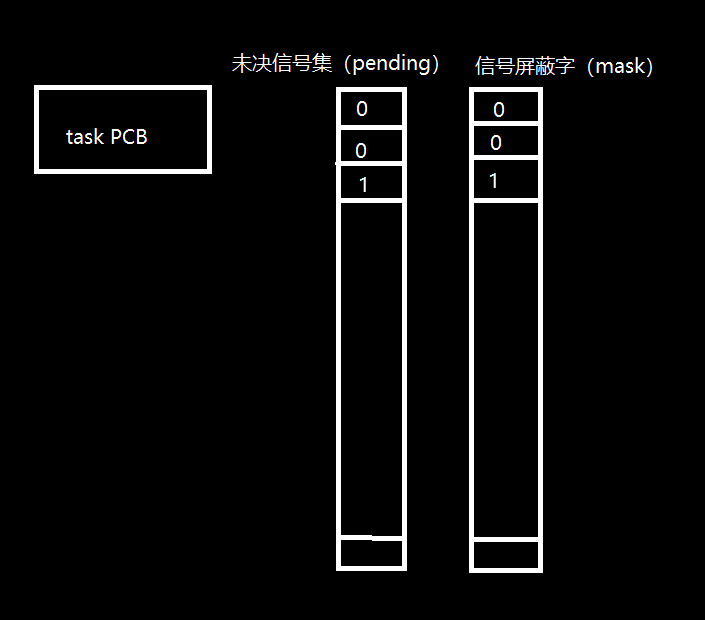

信号的状态：  
信号递达（Delivery ）：实际信号执行的处理过程(3种状态：忽略，执行默认动作，捕获)    
信号未决（Pending）：从产生到递达之间的状态    

信号集操作函数  
```c
sigset_t set;  自定义信号集。  是一个32bit  64bit  128bit的数组。
sigemptyset(sigset_t *set);	清空信号集
sigfillset(sigset_t *set);	全部置1
sigaddset(sigset_t *set, int signum);	将一个信号添加到集合中
sigdelset(sigset_t *set, int signum);	将一个信号从集合中移除
sigismember(const sigset_t *set，int signum); 判断一个信号是否在集合中。
```
函数用于设定对信号集内的信号的处理方式(阻塞或不阻塞)

> sigprocmask函数:  

sigprocmask函数是Linux/Unix中一种实现进程对信号的控制机制，它可以用来控制进程阻塞或者屏蔽信号，sigprocmask函数可以检测或更改其信号屏蔽字，或者在一个步骤中同时执行这两个操作

```c
#include <signal.h>
int sigprocmask(int how, 
                const sigset_t *restrict set, 
                sigset_t *restrict oset);
```
功能：获取或更改进程的信号屏蔽字。  
返回值：若成功则返回0，若出错则返回-1

参数:  

首先，若oset是非空指针，那么进程的当前信号屏蔽字通过oset返回。  

其次，若set是一个非空指针，则参数how指示如何修改当前信号屏蔽字。  

how：用于指定信号修改的方式，可能选择有三种：
（注意，不能阻塞SIGKILL和SIGSTOP信号）  

SIG_BLOCK ：  把参数set中的信号添加到信号屏蔽字中  
SIG_UNBLOCK： 从信号屏蔽字中删除参数set中的信号  
SIG_SETMASK： 把信号屏蔽字设置为参数set中的信号  

In [ ]:
//把SIGINT信号屏蔽掉，然后sleep5秒，最后解除屏蔽
#include <signal.h>
#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>


void handle(int sig)
{    
    printf("I get sig=%d\n",sig);
}

int main()
{
    
    struct sigaction act;           
    act.sa_handler = handle;
    sigemptyset(&act.sa_mask);   //清空屏蔽信号集    
    act.sa_flags = 0;
    
    sigaction(SIGINT, &act, NULL);
    
    sigset_t set;                     //定义用于管理信号的信号集
    sigemptyset(&set);                //清空信号集
    sigaddset(&set, SIGINT);          //把SIGINT信号添加到信号集中

    sigprocmask(SIG_BLOCK, &set, NULL);  //把set信号集中的信号进行屏蔽
    sleep(5);
    sigprocmask(SIG_UNBLOCK, &set, NULL); //解屏蔽

    while(1)
    {
        sleep(1);
    }
}

> pause 函数:

```c
int pause(void);
```  
功能:进程一直阻塞，直到被信号中断  
返回值：-1 并设置errno为EINTR   
函数行为：  
1. 如果信号的默认处理动作是终止进程，则进程终止，pause函数么有机会返回。
2. 如果信号的默认处理动作是忽略，进程继续处于挂起状态，pause函数不返回
3. 如果信号的处理动作是捕捉，则调用完信号处理函数之后，pause返回-1。
4. pause收到的信号如果被屏蔽，那么pause就不能被唤醒 

> sigsuspend函数:

sigsuspend函数是Unix-like操作系统中用于暂时替换进程的信号掩码并使进程休眠的函数
sigsuspend函数的工作方式是，它首先将进程的信号掩码设置为sigmask参数所指向的值，然后挂起进程的执行，直到捕获到一个信号或发生了一个会终止该进程的信号为止。如果捕获到一个信号并且从该信号的处理程序返回，那么sigsuspend函数就会返回，并且将该进程的信号掩码设置为调用sigsuspend之前的值

```c
int sigsuspend(const sigset_t *sigmask);
```
功能：将进程的屏蔽字替换为由参数sigmask给出的信号集，然后挂起进程的执行 
返回值:  
参数：  
sigmask：希望屏蔽的信号  

In [ ]:
#include <signal.h>
#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>


void handle(int sig)
{

    printf("I get sig=%d\n",sig);

}

void mytask()
{
    printf("My task start\n");
    sleep(3);
    printf("My task end\n");
}



int main()
{
    struct sigaction act;
    act.sa_handler = handle;
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);
    
    sigaction(SIGINT, &act, NULL);
    sigaction(SIGHUP, &act, NULL);
    
    sigset_t set,set2;
    sigemptyset(&set2);
    sigaddset(&set, SIGHUP);  //屏蔽
    sigaddset(&set, SIGINT);
    pause();
    
    while(1)
    {
        sigprocmask(SIG_BLOCK, &set, NULL);
        mytask();
                                            //执行过程中不被打断
        //sigprocmask(SIG_UNBLOCK,&set,NULL);
        //      pause();              //如果使用解屏蔽,pause接收不到信号
        
        sigsuspend(&set2);   //相当于上面注释的两句话的结合,而且可以接收到pause
    }
    printf("After pause\n");
    while(1)
    {
        sleep(1);
    } 
}    

## 消息队列

概念：
消息队列是System V IPC对象的一种  
消息队列由消息队列ID来唯一标识  
消息队列就是一个消息的列表。用户可以在消息队列中添加消息、读取消息等  
消息队列可以按照类型来发送/接收消息  
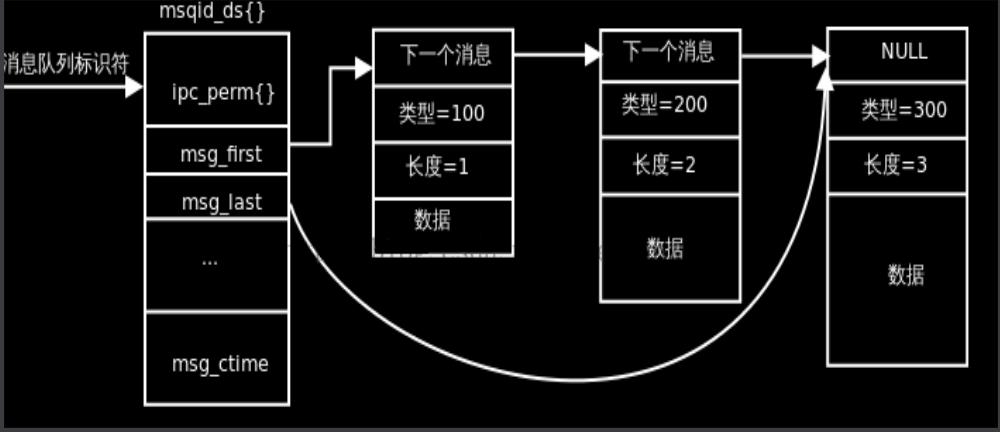

消息队列的使用：  
发送端：   
1. 申请Key  
2. 打开/创建消息队列   msgget  
3. 向消息队列发送消息   msgsnd  

接收端：  
1. 打开/创建消息队列   msgget  
2. 从消息队列接收消息   msgrcv  
3. 控制（删除）消息队列   msgctl  



> 打开/创建消息队列msgget

```c
#include <sys/ipc.h>
#include <sys/msg.h>
int msgget(key_t key, int msgflg);
```

功能: 打开创建消息队列
返回值:成功时返回消息队列的id，失败时返回EOF
参数: 
+ key消息队列的键值, 多个进程可以通过它访问同一个消息队列
IPC_PRIVATE 用于创建当前进程的私有消息队列 
ftok  
+ msgflg  权限标志位  IPC_CREAT|0666  IPC_CREAT：没有创建，有则打开。

> 发送消息msgsnd

```c
#include <sys/ipc.h>
#include <sys/msg.h>
int msgsnd(int msgid, 
           const void *msgp,
           size_t size,
           int msgflg);
```
功能:发送消息  
返回值:成功时返回0，失败时返回-1
参数:    
  msgid   消息队列id  
  msgp    消息缓冲区地址  
  size    消息正文长度  
  msgflg   标志位 0 或 IPC_NOWAIT  
msgflg:  
0：当消息队列满时，msgsnd将会阻塞，直到消息能写进消息队列  
IPC_NOWAIT：当消息队列已满的时候，msgsnd函数不等待立即返回  

> 消息格式：

```c
typedef struct
{
  long msg_type;
  char buf[128];
}msgT;  
```
注意：  
1. 消息结构必须有long类型的msg_type字段，表示消息的类型。
2. 消息长度不包括首类型 long

> 消息的接收msgrcv

```c
#include <sys/ipc.h>
#include <sys/msg.h>
int msgrcv(int msgid, 
           void *msgp, 
           size_t size, 
           long msgtype,
           int msgflg);
```
功能:消息的接收  
返回值: 成功时返回收到的消息长度，失败时返回-1  
参数:
  msgid   消息队列id  
  msgp   消息缓冲区地址  
  size   指定接收的消息长度   
  msgtype   指定接收的消息类型     
  msgflg   标志位    

msgtype：  
msgtype=0：收到的第一条消息，任意类型。  
msgtype>0：收到的第一条 msg_type类型的消息。  
msgtype<0：接收类型等于或者小于msgtype绝对值的第一个消息   
例子：如果msgtype=-4，只接受类型是1、2、3、4的消息    

msgflg：  
0：阻塞式接收消息   
IPC_NOWAIT：如果没有返回条件的消息调用立即返回，此时错误码为ENOMSG  
MSG_EXCEPT：与msgtype配合使用返回队列中第一个类型不为msgtype的消息  

> 消息队列的控制

```c
#include <sys/ipc.h>
#include <sys/msg.h>
int msgctl(int msgid, int cmd, struct msqid_ds *buf);
```
功能: 消息队列控制  
返回值: 成功时返回0，失败时返回-1  
参数:  
  msgid    消息队列id  
  cmd    要执行的操作  IPC_STAT / IPC_SET / IPC_RMID（删除）  
  buf   存放消息队列属性的地址  

In [ ]:
//消息队列发送端
#include <stdio.h>
#include <sys/ipc.h>
#include <sys/msg.h>
#include <string.h>

typedef struct  //消息结构体
{
    long msg_type;
    char buf[128];
}msgT;    

#define MSGLEN  (sizeof(msgT)-sizeof(long))  //消息结构体大小(不包含msg_type)

int main()
{
    key_t key;  //消息队列的key
    int msgid;  //消息队列的id
    int ret;
    msgT msg;
    key = ftok(".", 100);  //使用ftok函数获取消息队列的key，参数1：文件名，参数2：项目号
    if(key<0)
    {
        perror("ftok");
        return 0;
    }
    
    msgid = msgget(key, IPC_CREAT|0666);  //使用msgget创建消息队列，参数1：key值，参数2：权限
    if(msgid<0)
    {
        perror("msgget");
        return 0;
    }

    msg.msg_type = 1;  //设置消息类型
    strcpy(msg.buf, "this msg type 1");
    ret = msgsnd(msgid, &msg, MSGLEN, 0);  //发送消息，参数1：msgid，参数2：消息结构体指针，参数3：消息大小，参数4：是否阻塞
    if(ret<0)
    {
        perror("msgsnd");
        return 0;
    }    

    msg.msg_type = 2;
    strcpy(msg.buf, "this msg type 2");
    ret = msgsnd(msgid, &msg, MSGLEN, 0);
    if(ret<0)
    {
        perror("msgsnd");
        return 0;
    }
   
    msg.msg_type = 3;
    strcpy(msg.buf, "this msg type 3");
    ret = msgsnd(msgid, &msg, MSGLEN, 0);
    if(ret<0)
    {
        perror("msgsnd");
        return 0;
    }
    
    msg.msg_type = 4;
    strcpy(msg.buf, "this msg type 4");
    ret = msgsnd(msgid, &msg, MSGLEN, 0);
    if(ret<0)
    {
        perror("msgsnd");
        return 0;
    }
    
    msg.msg_type = 5;
    strcpy(msg.buf, "this msg type 5");
    ret = msgsnd(msgid, &msg, MSGLEN, 0);
    if(ret<0)
    {
        perror("msgsnd");
        return 0;
    }
}

In [ ]:
// 消息队列接收端
#include <stdio.h>
#include <sys/ipc.h>
#include <sys/msg.h>
#include <string.h>

typedef struct
{
    long msg_type;
    char buf[128];
}msgT;    

#define MSGLEN  (sizeof(msgT)-sizeof(long))
int main()
{
    
    int msgid;  //消息队列id
    key_t key;
    msgT msg;
    int ret;
    key = ftok(".", 100);  //ftok函数返回一个key值，这个key值是消息队列的唯一标识
    if(key<0)
    {
        perror("ftok");
        return 0;
    }    
    msgid = msgget(key, IPC_CREAT|0666);  //创建消息队列，并返回消息队列id
    if(msgid < 0)
    {
        perror("msgget");
        return 0;
    }
    int count=0;
    while(1)
    {
        ret = msgrcv(msgid, &msg, MSGLEN, 0, 0);  //接收消息
        if(ret<0)
        {
            perror("msgrcv");
            return 0;
        } 
        count++;
        if(count > 3)
        {
            break;
        }
        printf("receiv msg type=%d,buf=%s\n",(int)msg.msg_type,msg.buf);
    }

    ret = msgctl(msgid, IPC_RMID, NULL);  //删除消息队列
    if(ret<0)
    {
        perror("msgctl");
        return 0;
    }    
}

In [ ]:
#include<stdio.h>
#include<sys/types.h>
#include<sys/ipc.h>
#include<sys/msg.h>
#include<string.h>
#include<unistd.h>
#include<stdlib.h>


void msg_show_attr(int msgid, struct msqid_ds info)
{
    sleep(1);
    int ret = msgctl(msgid, IPC_STAT, &info);
    if(ret == -1)
    {
        printf("消息属性获取失败\n");
        return;
    }
    printf("\n");
    printf("现在队列中的字节数： %ld\n", info.msg_cbytes);
    printf("队列中消息数数： %ld\n", info.msg_qnum);
    printf("最后发送消息的进程： %ld\n", info.msg_qbytes);
    printf("最后接收消息的进程： %d\n", info.msg_lspid);
    printf("最后发送消息的时间： %s\n", ctime(&(info.msg_stime)));
    printf("最后接收消息的时间： %s\n", ctime(&(info.msg_rtime)));
    printf("最后变化时间： %s\n", ctime(&(info.msg_ctime)));
    printf("消息UID是: %d\n", info.msg_perm.uid);
    printf("消息GID是: %d\n", info.msg_perm.gid);
}
int main()
{
    struct msgmbuf
    {
        int mtype;
        char mtext[10];
    }msg_mbuf;
    struct msqid_ds msg_info;
    
    char *msgpath = "/ipc/msg";
    key_t key = ftok(msgpath, 'b');
    if(key != -1)
    {
        printf("成功建立KEY\n");
    }
 
    int msg_flags = IPC_CREAT | IPC_EXCL;
    int msg_id = msgget(key, msg_flags | 0x0666);
    if(msg_id != -1)
    {
        printf("消息建立失败\n");
        return 0;
    }

    msg_show_attr(msg_id, msg_info)  //显示消息队列属性
    
    int msg_sendflags = IPC_NOWAIT;
    msg_mbuf.mtype = 10;
    memcpy(msg_mbuf.mtext, "测试消息", sizeof("测试消息"));
    int rets = msgsnd(msg_id, &msg_mbuf, sizeof("测试消息"), msg_sendflags);
    if(rets == -1)
    {
        printf("消息发送失败\n");
        return 0;
    }
    msg_show_attr(msg_id, msg_info);  //显示消息队列属性

    int msg_recvflags = IPC_NOWAIT | MSG_NOERROR;
    int retr  = msgrcv(msg_id, &msg_mbuf, sizeof("测试消息"), 10, msg_recvflags);
    if(retr == -1)
    {
        printf("消息接收失败\n");
        return 0;
    }
    else 
    {
        printf("消息接收成功,长度： %d\n", retr);
    }
    msg_show_attr(msg_id, msg_info);  //显示消息队列属性

    msg_info.msg_perm.uid = 8;
    msg_info.msg_perm.gid = 8;
    msg_info.msg_qbytes = 12345;
    int ret = msgctl(msg_id, IPC_SET, &msg_info);
    if(ret == -1)
    {
        printf("消息属性修改失败\n");
        return 0;
    }
    msg_show_attr(msg_id, msg_info);  //显示消息队列属性

    int ret = msgctl(msg_id, IPC_RMID, NULL);
    if(ret == -1)
    {
        printf("消息删除失败\n");
        return 0;
    }
    return 0;
}

## 信号量

概念:  
信号量/灯(semaphore)  

信号量是一种计数器，信号量代表某一类资源，其值表示系统中该资源的数量  

常被用作是一种锁机制，限制另一个进程访问特定的资源  

信号量是一个受保护的变量，只能通过三种操作来访问：    
+ 初始化  
+ Ｐ操作(申请资源)  
+ Ｖ操作(释放资源)

linux中有三种信号量：  
+ Posix 有名信号量   
+ Posix 无名信号量 （linux只支持线程同步） 
Posix 信号灯的使用需要链接pthread库 
+ System V 信号量  

信号量PV操作  
Ｐ(Ｓ) 含义如下:  
```c
     if(信号量的值大于0) 
     {   
          申请资源的任务继续运行；
          信号量的值减一；  
     }
     else 
     {   
          申请资源的任务阻塞；
     }
``` 
V(Ｓ) 含义如下:
``` c
     信号量的值加一；
     if (有任务在等待资源) 
     {
          唤醒等待的任务，让其继续运行
     }
```
让我们用一个现实生活中的例子来解释PV操作和信号量。

假设我们有一个停车场，这个停车场只有10个停车位。每个停车位可以看作是一个资源。我们可以用一个信号量来表示空闲的停车位数量。初始时，这个信号量的值为10，表示有10个空闲的停车位。

当一辆车进入停车场时，我们执行一个P操作，使信号量的值减1。如果信号量的值大于等于0，那么这辆车可以停入一个停车位。否则，如果信号量的值小于0，那么这辆车必须在停车场外等待，直到有车辆离开停车场。

当一辆车离开停车场时，我们执行一个V操作，使信号量的值加1。如果信号量的值大于0并且有车辆在等待，那么我们就唤醒等待的车辆，让它进入停车场。

总之，PV操作是用来限制资源访问的，它通过信号量来控制资源的使用。

### Posix有名信号量

有名信号灯的使用:  

> 有名信号灯打开sem_open  
  
```c
sem_t *sem_open(const char *name, int oflag);
sem_t *sem_open(const char *name, int oflag, mode_t mode, unsigned int value);
```
功能:打开有名信号灯  

参数：

+ name：name是给信号灯起的名字  
+ oflag：打开方式，常用O_CREAT   
+ mode：文件权限。常用0666  
+ value：信号量值。二元信号灯值为1，普通表示资源数目  

信号灯文件位置：/dev/shm

> 有名信号灯关闭sem_close

```c
int sem_close(sem_t *sem);
```

> 有名信号灯的删除sem_unlink

```c
int sem_unlink(const char* name);
```

> 信号灯PV操作:

>> 信号灯P操作:   

获取资源
```c
int sem_wait(sem_t *sem);
```


如果信号量为0，表示这时没有相应资源空闲，那么调用线程就将挂起，直到有空闲资源可以获取    

>> 信号灯V操作:   

释放资源
```c
int sem_post(sem_t *sem);
```

|  条件 |   |  操作 |   |
| ----- | ----- | ----- | ----- |
| 如果没有线程阻塞在该sem上 | 没有线程等待该资源 | 对信号量的值进行增1操作 | 表示同类资源多增加了一个 |   
| 如果至少有一个线程阻塞在该sem上 | 表示有线程等待资源 | 信号量为0，保持信号量为0不变 | 并使某个阻塞在该sem上的线程从sem_wait函数中返回 |   

注意：编译posix信号灯需要加pthread动态库。  

In [ ]:
//写
#include <fcntl.h>           /* For O_* constants */
#include <sys/stat.h>        /* For mode constants */
#include <semaphore.h>

#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <sys/ipc.h>
#include <sys/shm.h>
#include <signal.h>

//捕获退出信号,删除sem文件
void delsemfile(int sig)
{
    sem_unlink("mysem_w");
    exit(0);

}

int main()
{

// 捕获退出信号
    struct sigaction act;
    act.sa_handler = delsemfile;  //一旦捕捉到退出信号则删除信号量
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);
    sigaction(SIGINT, &act, NULL);

// 共享内存
    key_t key = ftok(".", 100);  // 100是随机数,保证不同进程的key值
    if(key < 0)
    {
        perror("ftok");
        return 0;
    }
    int shmid = shmget(key, 500, 0666 | IPC_CREAT);  //创建共享内存,大小500字节,权限666
    if(shmid < 0)
    {
        perror("shmget");
        return 0;
    }
    //共享内存映射,访问地址
    char* shmaddr = shmat(shmid, NULL, 0);
    
// 信号量
    //先 打开/创建 信号量
    //保证读完再写,和写完再读
    sem_t *sem_r = sem_open("mysem_r", O_CREAT | O_RDWR, 0666, 0);  //打开“mysem_r”这个读有名信号量,并初始化为0
    sem_t *sem_w = sem_open("mysem_w", O_CREAT | O_RDWR, 0666, 1);  //打开写信号量
    while(1)
    {
        //P操作,等待信号量
        sem_wait(sem_w); //等待可写 
        printf(">");
        fgets(shmaddr, 500, stdin); 
        //V操作,释放信号量
        sem_post(sem_r);  //释放可读
    }
}

In [ ]:
#include <fcntl.h>           /* For O_* constants */
#include <sys/stat.h>        /* For mode constants */
#include <semaphore.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <sys/ipc.h>
#include <sys/shm.h>
#include <signal.h>


void delsemfile(int sig)
{
    sem_unlink("mysem_r");
    exit(0);
}

int main()
{
    struct sigaction act;
    act.sa_handler = delsemfile;
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);
    sigaction(SIGINT, &act, NULL);

    key_t key = ftok(".", 100);
    if(key < 0)
    {
        perror("ftok");
        return 0;
    }
    int shmid = shmget(key, 500, 0666 | IPC_CREAT);
    if(shmid < 0)
    {
        perror("shmget");
        return 0;
    }
    char *shmaddr = shmat(shmid, NULL, 0);
   
    sem_t *sem_r = sem_open("mysem_r", O_CREAT | O_RDWR, 0666, 0);
    sem_t *sem_w = sem_open("mysem_w", O_CREAT | O_RDWR, 0666, 1);
    while(1)
    {
        sem_wait(sem_r);  
        printf("%s\n", shmaddr);
        sem_post(sem_w);  
    }
}

### Posix无名信号量

无名信号灯使用

> 无名信号灯初始化:

```c
int sem_init(sem_t *sem, int shared, unsigned int value);
```
参数：  
+ sem：需要初始化的信号灯变量  
+ shared: shared指定为0，表示信号量只能由初始化这个信号量的进程使用，不能在进程间使用,linux 不支持进程间同步。  
+ Value:信号量的值  


> 无名信号灯销毁:  

```c
int sem_destroy(sem_t* sem);
```


In [ ]:
#include <fcntl.h>           /* For O_* constants */
#include <sys/stat.h>        /* For mode constants */
#include <semaphore.h>

#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <sys/ipc.h>
#include <sys/shm.h>
#include <signal.h>
#include <pthread.h>


sem_t sem_r,sem_w;
char *shmaddr;
void destroysem(int sig)
{
   sem_destroy(&sem_r);
   sem_destroy(&sem_w);
   exit(0);

}

void *readmem(void *arg)
{
    while(1)
    {
        sem_wait(&sem_r);
        printf("%s\n",shmaddr);
        sem_post(&sem_w);
    }

}


int main()
{
    struct sigaction act;
    act.sa_handler = destroysem;
    act.sa_flags = 0;
    sigemptyset(&act.sa_mask);
    sigaction(SIGINT, &act, NULL);

    key_t key = ftok(".",100);
    if(key < 0)
    {
        perror("ftok");
        return 0;
    }
    int shmid = shmget(key, 500, 0666 | IPC_CREAT);
    if(shmid < 0)
    {
        perror("shmget");
        return 0;
    }
    shmaddr = shmat(shmid, NULL, 0);
   
    sem_init(&sem_r, 0, 0);
    sem_init(&sem_w, 0, 1);

    pthread_t tid;
    pthread_create(&tid, NULL, readmem, NULL);

    while(1)
    {
        sem_wait(&sem_w);
        printf(">");
        fgets(shmaddr,500,stdin);
        sem_post(&sem_r);
    }
}


### System V 信号灯使用：

> 创建信号灯 semget

```c
int semget(key_t key, int nsems, int semflg);
```
功能：创建/打开信号灯  
参数：  
key：ftok产生的key值（和信号灯关联的key值）  
nsems：信号灯集中包含的信号灯数目  
semflg：信号灯集的访问权限，通常为IPC_CREAT |0666  
返回值：成功：信号灯集ID ； 失败：-1  

> 信号灯pv操作  semop

```c
int semop (int semid, struct sembuf *opsptr, size_t nops);
```
功能：对信号灯集合中的信号量进行P - V操作  
参数：  
semid：信号灯集ID   
```c 
struct sembuf   
{  
　　　　short sem_num;  // 要操作的信号灯的编号  
　　　　short sem_op;   // 1 : 释放资源，V操作  
                       // -1 : 分配资源，P操作    
　　　　short sem_flg;  // 0（阻塞）,IPC_NOWAIT, SEM_UNDO  
};//对某一个信号灯的操作，如果同时对多个操作，则需要定义这种结构体数组  
```
nops: 要操作的信号灯的个数 ，1个  
返回值：成功 ：0 ； 失败：-1  

> 信号灯集合控制 semctl

```c
int semctl ( int semid, int semnum, int cmd…/*union semun arg*/);
```
功能：  
信号灯集合的控制（初始化/删除）  
参数：  
semid：信号灯集ID  
semnum: 要操作的集合中的信号灯编号  
cmd：  
　　　GETVAL：获取信号灯的值，返回值是获得值  
　　　SETVAL：设置信号灯的值，需要用到第四个参数：共用体  
　　　IPC_RMID：从系统中删除信号灯集合  
返回值：成功 0 ； 失败 -1  


> 信号量数据结构

```c
union semun
{
    int val;                // 用于设置信号量值
    struct semid_ds *buf;  // 指向semid_ds结构
    unsigned short *array; // 指向数组
    struct seminfo *__buf;  // 指向seminfo结构
}
```

> 信号量建立

```c
typedef int sem_t;
union semun
{
    int val;                // 用于设置信号量值
    struct semid_ds *buf;  // 指向semid_ds结构
    unsigned short *array; // 指向数组
};

sem_t CreateSem(key_t key, int value)  //建立信号量，魔数key，初始值value
{  
    union semun sem;  // 信号量结构变量
    sem.val = value;  // 初始化信号量
    sem_t semid = semget(key, 1, IPC_CREAT | IPC_EXCL | 0666);  // 获得信号量ID
    if(semid == -1)
    {
        printf(“create semaphore error\n”);
        return -1;
    }
    semctl(semid, 0, SETVAL, sem);  //发送命令，建立value个信号量
    return semid;
}
```

In [ ]:
#include <semaphore.h>
#include <stdio.h>
#include <unistd.h>
#include <stdlib.h>
#include <string.h>

#include <sys/ipc.h>
#include <sys/shm.h>
#include <sys/types.h>
#include <sys/sem.h>

#define SEM_READ   0
#define SEM_WRITE  1

union semun 
{
   int val;
};               

void Poperation(int semid, int semindex)
{
   struct sembuf sbuf;
   sbuf.sem_num =  semindex;
   sbuf.sem_op = -1;
   sbuf.sem_flg = 0;

   semop(semid, &sbuf, 1);
}
void Voperation(int semid, int semindex)
{
   struct sembuf sbuf;
   sbuf.sem_num =  semindex;
   sbuf.sem_op = 1;
   sbuf.sem_flg = 0;
              
   semop(semid, &sbuf, 1);
}


int main()
{
    key_t key = ftok(".", 100);
    if(key < 0)
    {
        perror("ftok");
        return 0;
    }
    
    int semid = semget(key, 2, IPC_CREAT | 0666);
    if(semid < 0)
    {
        perror("semget");
        return 0;
    }
    int shmid = shmget(key, 500, IPC_CREAT |0666);
    char *shmaddr = shmat(shmid, NULL, 0);
    union semun mysem;
    mysem.val = 0;
    semctl(semid, SEM_READ, SETVAL, mysem);
    mysem.val = 1;
    semctl(semid, SEM_WRITE, SETVAL, mysem);

    pid_t pid = fork();
    if(pid < 0)
    {
        perror("fork");
        shmctl(shmid, IPC_RMID, NULL);
        semctl(semid, 0, IPC_RMID);
        exit(-1);
    }
    else if(pid == 0)
    {
        while(1)
        {
            Poperation(semid,SEM_READ);
            printf("%s\n",shmaddr);
            Voperation(semid,SEM_WRITE);
        }
    }
    else
    {
        while(1)
        {
            Poperation(semid,SEM_WRITE);
            printf(">");
            fgets(shmaddr,32,stdin);
            Voperation(semid,SEM_READ);
        }
    }
}

In [ ]:
#include <stdio.h>
#include <sys/sem.h>
#include <sys/ipc.h>

typedef int sem_t;

union semun
{
    int val;
    struct semid_ds *buf;
    unsigned short *array;
};

int Sem_P(sem_t semid)
{
    struct sembuf buf = {0, +1, IPC_NOWAIT};
    return semop(semid, &buf, 1);
}
int Sem_V(sem_t semid)
{
    struct sembuf buf = {0, -1, IPC_NOWAIT};
    return semop(semid, &buf, 1);
}
sem_t CreateSem(key_t key, int value)
{
    union semun sem;
    sem.val = value;
    sem_t semid = semget(key, 1, IPC_CREAT | IPC_EXCL | 0666);
    if(semid == -1)
    {
        perror("semget");
        return -1;
    }
    semctl(semid, 0, SETVAL, sem);
    return semid;
}
void SetvalueSem(sem_t semid, int value)
{
    union semun sem;
    sem.val = value;
    semctl(semid, 0, SETVAL, sem);
}
int GetvalueSem(sem_t semid)
{
    union semun sem;
    return semctl(semid, 0, GETVAL, &sem);
}
void DestroySem(sem_t semid)
{
    union semun sem;
    sem.val = 0;
    semctl(semid, 0, IPC_RMID, &sem);
}
int main(void)
{
    key_t key = ftok("./ipc/sem", 'a');
    int semid = CreateSem(key, 100);
    for(int i =0; i <= 3; i++)
    {
        Sem_P(semid);
        Sem_V(semid);
    }
    int value = GetvalueSem(semid);
    printf("信号量的值为: %d\n", value);
    DestroySem(semid);
    return 0;
}

# 整理和复习

一个程序进入运行状态后，变成一个进程

在我们平常的使用操作系统的时候会打开多个应用，每个应用就是一个进程

产生进程的方式：
1. 用户发起一个请求，比如打开一个应用
2. 程序调用fork，产生一个子进程
3. 程序调用exec，替换进程的代码
   
结束进程的方式：
1. 程序调用wait，等待子进程结束
2. 程序调用exit，结束进程
3. 程序调用kill，结束进程
4. 程序调用signal，结束进程
5. 程序调用abort，结束进程
6. 程序调用terminate，结束进程
7. 程序调用exit，结束进程

线程通常是在进程中开辟出来的，一个进程中可以有很多线程

使用进程和线程的目的是为了提高程序的并发性，同一时间可以运行多个程序

进程是在一个程序上再复制出一个进程，每个进程各自执行自己的代码，两个程序同时进行

线程是在一个程序中同时运行两个函数中的代码，一个线程执行一个函数

多个程序同时运行，会占用多个CPU，每个CPU会运行一个进程，每个进程会运行多个线程
一个CPU同时只能运行一个进程，一个进程中可以运行多个线程
一个进程中的多个线程可以共享内存，但是不能共享数据

操作系统通过一系列的机制来协调进程的运行。以下是一些主要的机制：

    进程调度：操作系统在多个等待使用处理器的进程中，按照一定策略选择合适的进程，使之拥有处理器的使用权而进入运行。

    进程同步：操作系统设置同步机制来实现对所有进程的运行进行协调，协调的方式包括进程的互斥和进程的同步。例如，PV操作和互斥锁就是实现进程同步的一种方式。

    进程控制：操作系统必须设置一套控制机构来实现进程创建、进程撤销以及进程在运行过程中的状态转换。

    进程通信：进程间的通信是另一种重要的协调机制，它允许进程之间共享数据和信号12345。常见的进程通信方式包括共享存储、消息传递和管道通信等。

    资源管理：操作系统负责分配和管理系统资源，如内存、CPU时间、I/O设备等，以确保每个进程都能得到所需的资源。

总的来说，操作系统通过以上这些机制来协调进程的运行，以实现并发执行，提高系统的效率和响应速度12345。希望这个解释对你有所帮助！


